**DATA IMPORT**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Airline_Delay_Cause.csv')

In [ ]:
df.head()

year  month carrier       carrier_name airport  \
0  2023     12      9E  Endeavor Air Inc.     ABE   
1  2023     12      9E  Endeavor Air Inc.     AEX   
2  2023     12      9E  Endeavor Air Inc.     AGS   
3  2023     12      9E  Endeavor Air Inc.     ALB   
4  2023     12      9E  Endeavor Air Inc.     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         72.0        5.0   
1           Alexandria, LA: Alexandria International         62.0        7.0   
2        Augusta, GA: Augusta Regional at Bush Field         95.0       10.0   
3                   Albany, NY: Albany International         23.0        2.0   
4  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...       2111.0      256.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        2.46        1.00  ...          0.0              0.81            0.0   
1        4.25        0.00  ...          0.0              1.75            0.0   
2        5.94        0.00  ...          0.0              3.00            0.0   
3        0.56        0.00  ...          0.0              1.44            1.0   
4       76.88        8.75  ...          0.0            117.94            1.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           0.0      672.0           61.0          574.0       20.0   
1           0.0      348.0          252.0            0.0       33.0   
2           0.0      859.0          536.0            0.0       47.0   
3           0.0       75.0            9.0            0.0        0.0   
4           0.0    21424.0         8906.0          732.0     1487.0   

   security_delay  late_aircraft_delay  
0             0.0                 17.0  
1             0.0                 63.0  
2             0.0                276.0  
3             0.0                 66.0  
4             0.0              10299.0  

[5 rows x 21 columns]

In [ ]:
print("Dataset shape:", df.shape)
print(df.info())

Dataset shape: (178997, 21)
<class 'pandas.core.frame.DataFrame'>
Index: 178997 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 178997 non-null  int64  
 1   month                178997 non-null  int64  
 2   carrier              178997 non-null  object 
 3   carrier_name         178997 non-null  object 
 4   airport              178997 non-null  object 
 5   airport_name         178997 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178997 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64

In [ ]:
df.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            341
arr_del15              591
carrier_ct             341
weather_ct             341
nas_ct                 341
security_ct            341
late_aircraft_ct       341
arr_cancelled          341
arr_diverted           341
arr_delay              341
carrier_delay          341
weather_delay          341
nas_delay              341
security_delay         341
late_aircraft_delay    341
dtype: int64

In [ ]:
#computing missing values of arr_del15
count_col = ['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']
df['arr_del15'] = df['arr_del15'].fillna(df[count_col].sum(axis=1))
df.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            341
arr_del15                0
carrier_ct             341
weather_ct             341
nas_ct                 341
security_ct            341
late_aircraft_ct       341
arr_cancelled          341
arr_diverted           341
arr_delay              341
carrier_delay          341
weather_delay          341
nas_delay              341
security_delay         341
late_aircraft_delay    341
dtype: int64

In [ ]:
#drop mising values
df.dropna(inplace=True)


In [ ]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                year          month    arr_flights      arr_del15  \
count  178997.000000  178997.000000  178997.000000  178997.000000   
mean     2019.479315       6.485611     327.816969      58.627089   
std         2.410860       3.464020     931.001446     164.277835   
min      2015.000000       1.000000       1.000000       0.000000   
25%      2018.000000       3.000000      41.000000       6.000000   
50%      2020.000000       6.000000      89.000000      15.000000   
75%      2022.000000       9.000000     218.000000      40.000000   
max      2023.000000      12.000000   21977.000000    4176.000000   

          carrier_ct     weather_ct         nas_ct    security_ct  \
count  178997.000000  178997.000000  178997.000000  178997.000000   
mean       18.572643       2.035742      17.094929       0.145307   
std        47.389651       6.894812      56.279604       0.702149   
min         0.000000       0.000000       0.000000       0.000000   
25%         

In [ ]:
df.iloc[:,:6].nunique()

year              9
month            12
carrier          29
carrier_name     39
airport         393
airport_name    417
dtype: int64

-> If each code maps to exactly one name, the number of codes and names should  be the same.

-> But here, carrier_name has more unique values than carrier, which hints at inconsistencies or duplication.

**EXPLORATORY DATA ANALYSIS (EDA)**

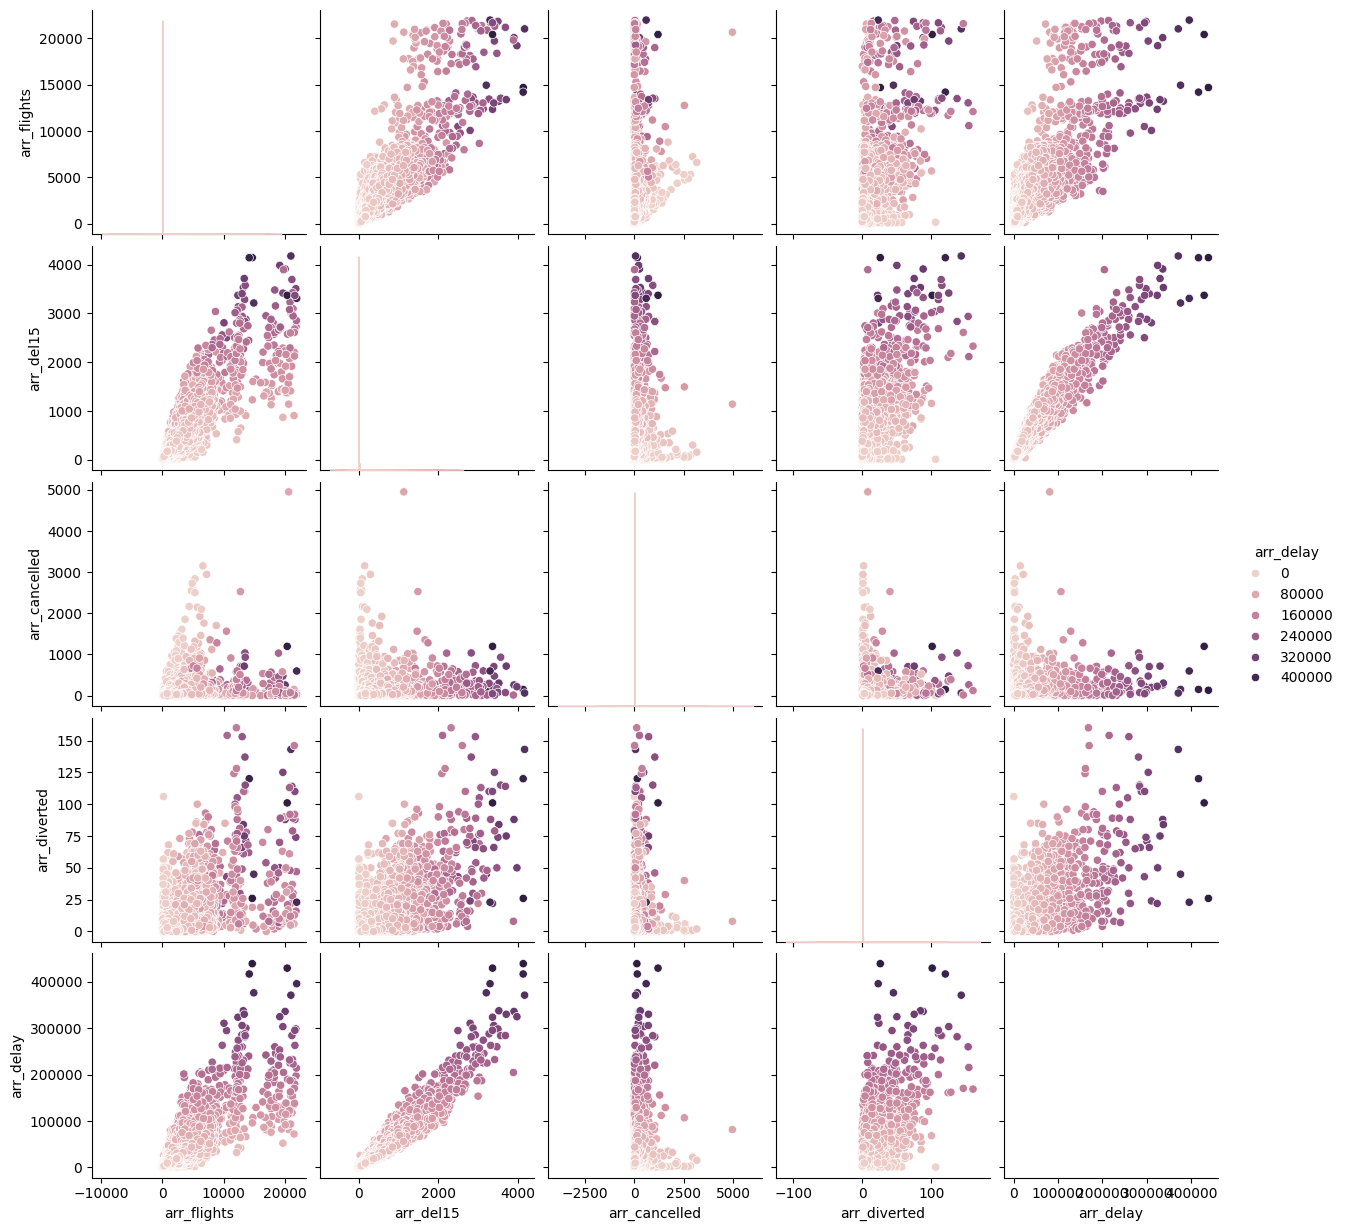

In [ ]:
sns.pairplot(df, hue='arr_delay', vars=['arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay'])
plt.show()

In [ ]:
#YEARLY DATASET
yearly = df.groupby('year')[['arr_flights','arr_del15']].sum().reset_index()
yearly['delay_ratio'] = yearly['arr_del15']/yearly['arr_flights']
yearly.sort_values(by = 'arr_flights',ascending=False)

year  arr_flights  arr_del15  delay_ratio
4  2019    8091684.0  1527455.0     0.188768
3  2018    7848697.0  1481608.0     0.188771
8  2023    7278739.0  1464539.0     0.201208
7  2022    7013508.0  1426305.0     0.203365
6  2021    6311871.0  1068059.0     0.169214
0  2015    5819079.0  1063439.0     0.182750
2  2017    5674621.0  1029474.0     0.181417
1  2016    5617658.0   964239.0     0.171644
5  2020    5022397.0   468955.0     0.093373

In [ ]:
#year with max and min value
print('Year with most delay', yearly.loc[yearly['arr_del15'].idxmax(),'year'])
print('Year with least delay', yearly.loc[yearly['arr_del15'].idxmin(),'year'])

print('Year with most Flights', yearly.loc[yearly['arr_flights'].idxmax(),'year'])
print('Year with least Flights', yearly.loc[yearly['arr_flights'].idxmin(),'year'])

print('Year with highest delay ratio', yearly.loc[yearly['delay_ratio'].idxmax(),'year'])
print('Year with lowest dealy_ratio', yearly.loc[yearly['delay_ratio'].idxmin(),'year'])

Year with most delay 2019
Year with least delay 2020
Year with most Flights 2019
Year with least Flights 2020
Year with highest delay ratio 2022
Year with lowest dealy_ratio 2020


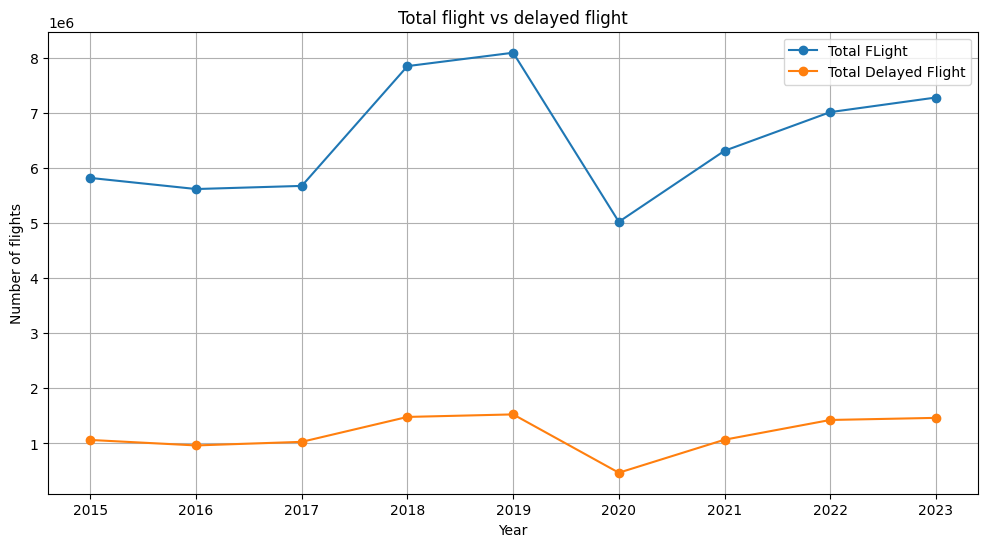

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(yearly['year'],yearly['arr_flights'],label='Total FLight', marker = 'o')
plt.plot(yearly['year'],yearly['arr_del15'],label = 'Total Delayed Flight',marker = 'o')
plt.title('Total flight vs delayed flight')
plt.ylabel('Number of flights')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()

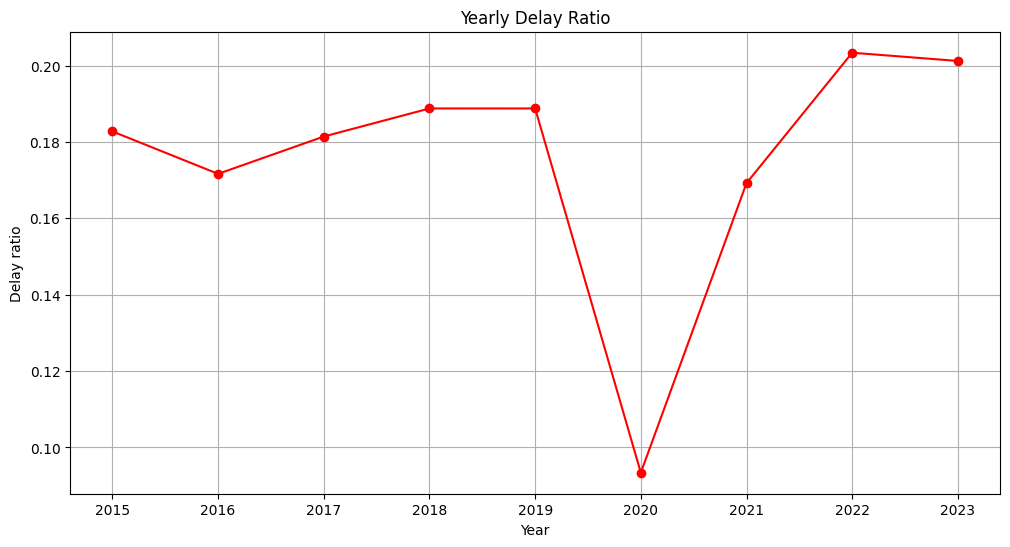

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(yearly['year'],yearly['delay_ratio'],color = 'red', marker = 'o')
plt.title('Yearly Delay Ratio')
plt.xlabel('Year')
plt.ylabel('Delay ratio')
plt.grid(True)
plt.show()

In [ ]:
#Count and delay column
count_col = ['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']
delay_col = ['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']

In [ ]:
#delay by minutes
yearly_delay_min=df.groupby('year')[delay_col].sum().reset_index()
#delay count
yearly_delay_count=df.groupby('year')[count_col].sum().reset_index()

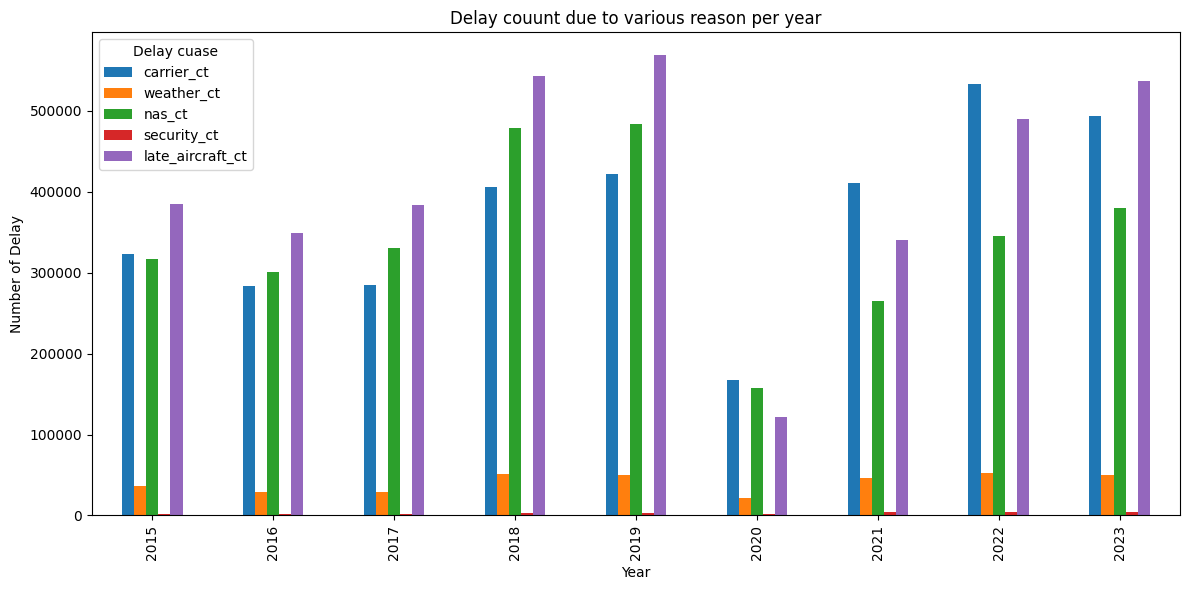

In [ ]:
#Bar graph for count
yearly_delay_count.set_index('year').plot(kind = 'bar' , stacked = False , figsize = (12,6))
plt.title('Delay couunt due to various reason per year')
plt.xlabel('Year')
plt.ylabel('Number of Delay')
plt.legend(title='Delay cuase')
plt.tight_layout()
plt.show()

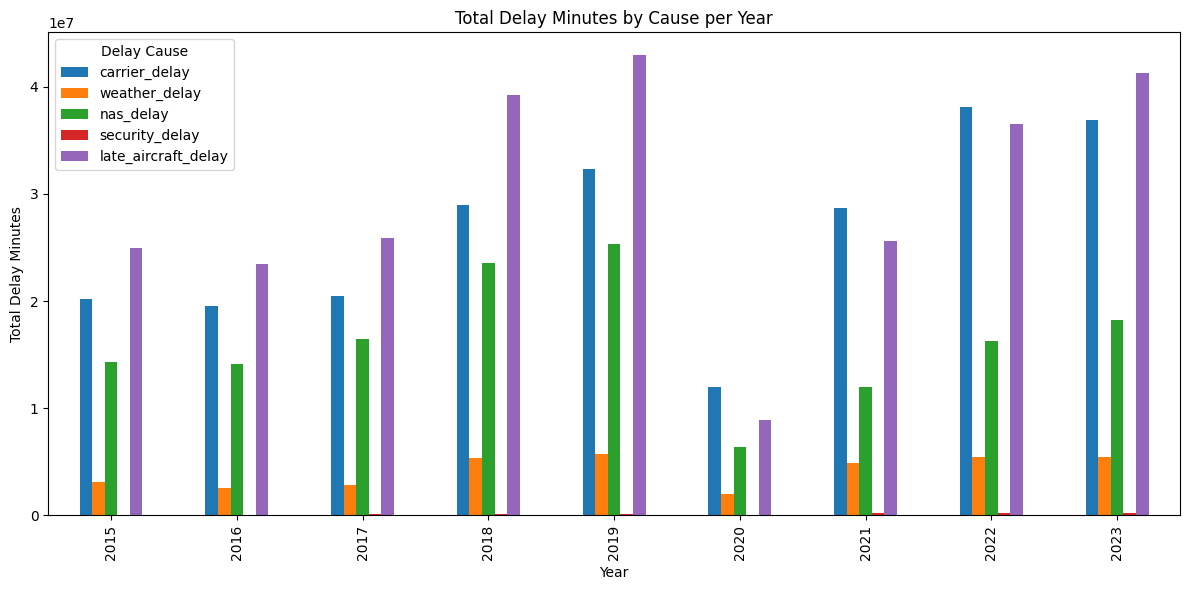

In [ ]:
#Bar graph for delay min
yearly_delay_min.set_index('year').plot(kind='bar', stacked=False, figsize=(12,6))
plt.title("Total Delay Minutes by Cause per Year")
plt.ylabel("Total Delay Minutes")
plt.xlabel("Year")
plt.legend(title="Delay Cause")
plt.tight_layout()
plt.show()

In [ ]:
#normalised as per total flights
delay_count_per_total_flight = yearly_delay_count.copy()
for col in count_col:
  delay_count_per_total_flight[f'{col}_ratio_total'] = yearly_delay_count[col]/yearly['arr_flights']

In [ ]:
#normalised as arr_del15
delay_count_per_delayed_flight = yearly_delay_count.copy()
for col in count_col :
  delay_count_per_delayed_flight[f'{col}_ratio_delayed'] = yearly_delay_count[f'{col}']/yearly['arr_del15']

In [ ]:
delay_minutes_per_flight = yearly_delay_min.copy()
for col in delay_col :
  delay_minutes_per_flight[f'{col}_per_flight'] = yearly_delay_min[f'{col}']/yearly['arr_flights']

In [ ]:
delay_minutes_ratio_delayed = yearly_delay_min.copy()
for col in delay_col:
  delay_minutes_ratio_delayed[f'{col}_cause'] = yearly_delay_min[f'{col}']/yearly['arr_del15']

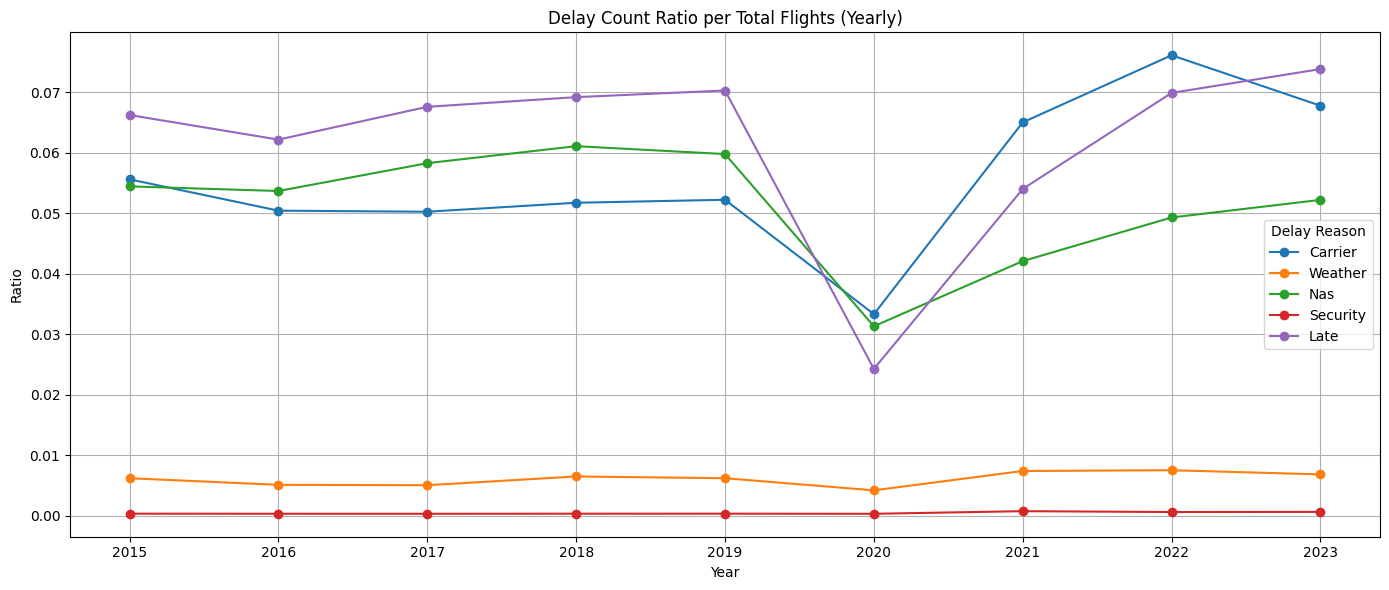

In [ ]:
plt.figure(figsize=(14, 6))

for reason in delay_count_per_total_flight.columns[-5:].tolist():
    plt.plot(delay_count_per_total_flight['year'], delay_count_per_total_flight[reason], marker='o', label=reason.split('_')[0].capitalize())

plt.title('Delay Count Ratio per Total Flights (Yearly)')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend(title="Delay Reason")
plt.grid(True)
plt.tight_layout()
plt.show()

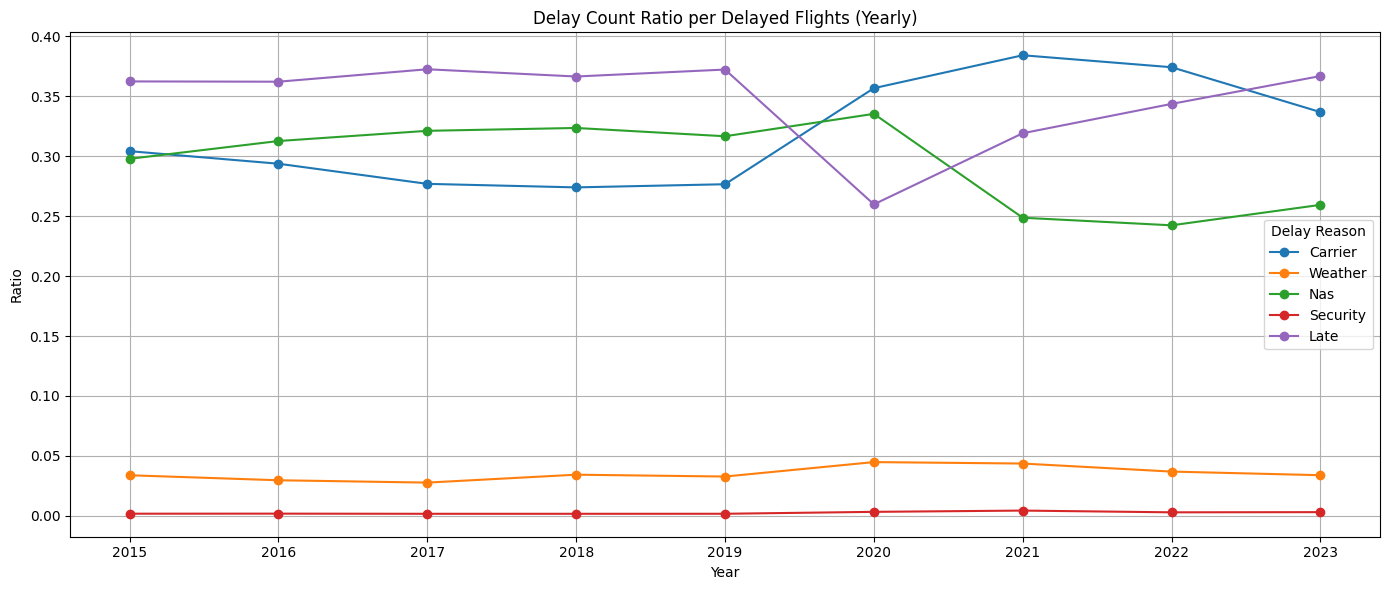

In [ ]:
plt.figure(figsize=(14, 6))

for reason in delay_count_per_delayed_flight.columns[-5:].tolist():
    plt.plot(delay_count_per_delayed_flight['year'], delay_count_per_delayed_flight[reason], marker='o', label=reason.split('_')[0].capitalize())

plt.title('Delay Count Ratio per Delayed Flights (Yearly)')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend(title="Delay Reason")
plt.grid(True)
plt.tight_layout()
plt.show()


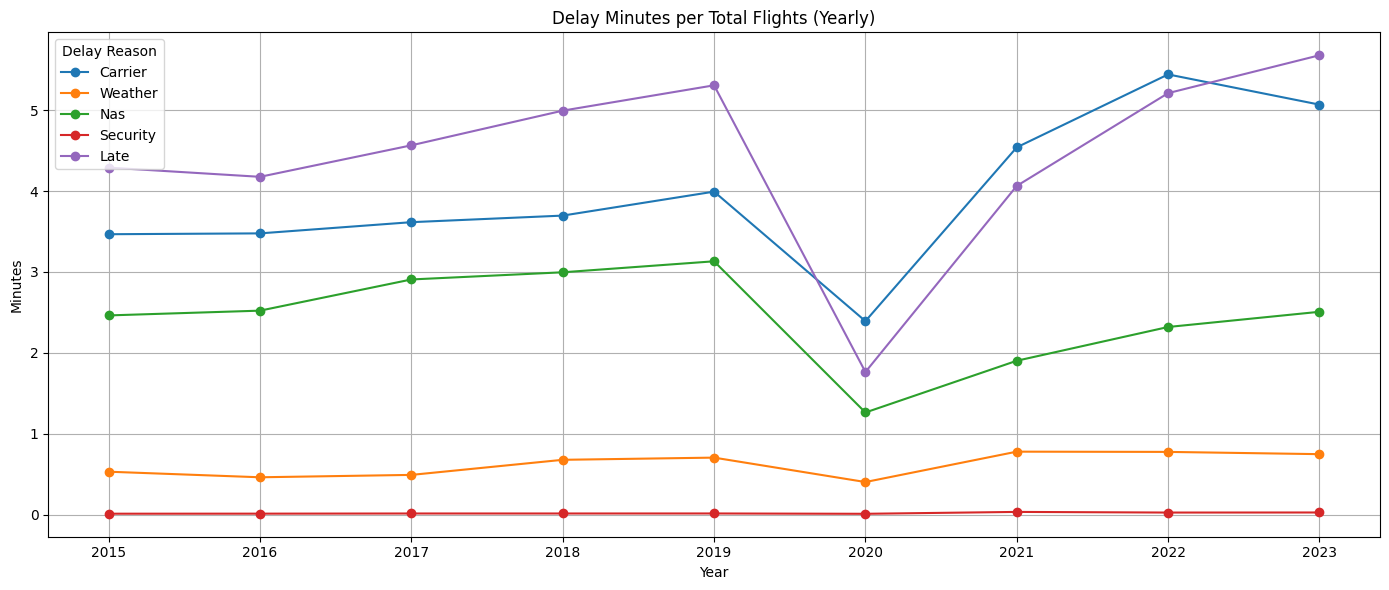

In [ ]:
plt.figure(figsize=(14, 6))

for reason in delay_minutes_per_flight.columns[-5:].tolist():
    plt.plot(delay_minutes_per_flight['year'], delay_minutes_per_flight[reason], marker='o', label=reason.split('_')[0].capitalize())

plt.title('Delay Minutes per Total Flights (Yearly)')
plt.xlabel('Year')
plt.ylabel('Minutes')
plt.legend(title="Delay Reason")
plt.grid(True)
plt.tight_layout()
plt.show()


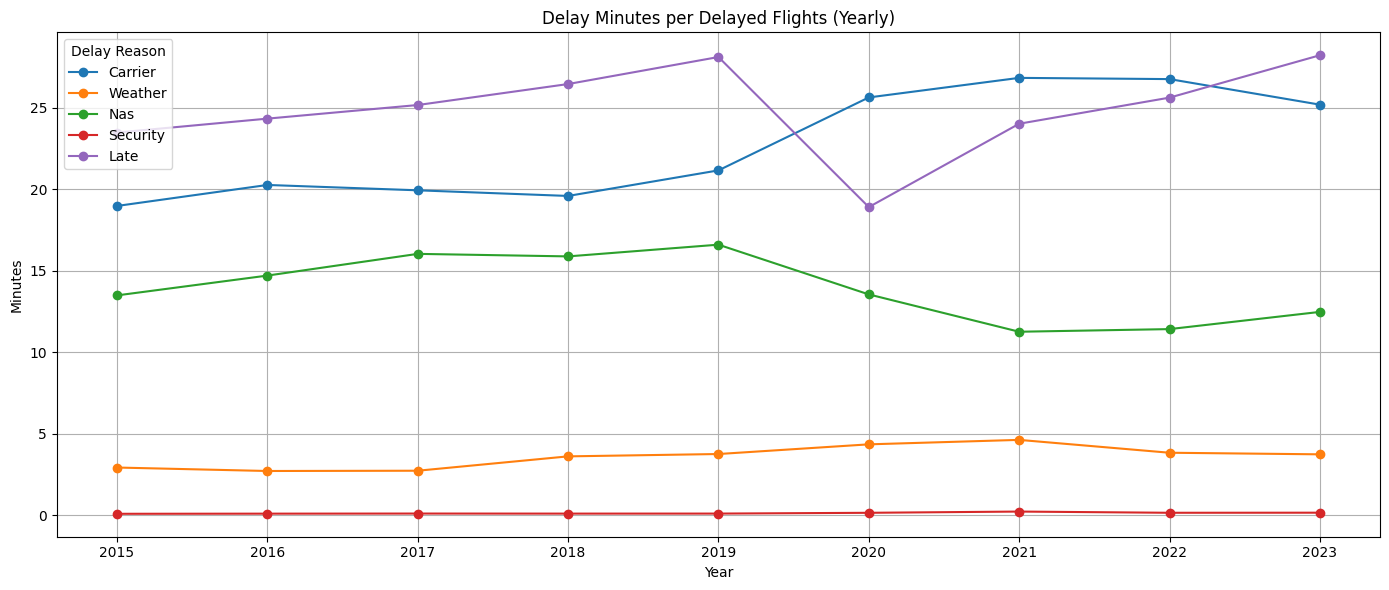

In [ ]:
plt.figure(figsize=(14, 6))

for reason in delay_minutes_ratio_delayed.columns[-5:].tolist():
    plt.plot(delay_minutes_ratio_delayed['year'], delay_minutes_ratio_delayed[reason], marker='o', label=reason.split('_')[0].capitalize())

plt.title('Delay Minutes per Delayed Flights (Yearly)')
plt.xlabel('Year')
plt.ylabel('Minutes')
plt.legend(title="Delay Reason")
plt.grid(True)
plt.tight_layout()
plt.show()


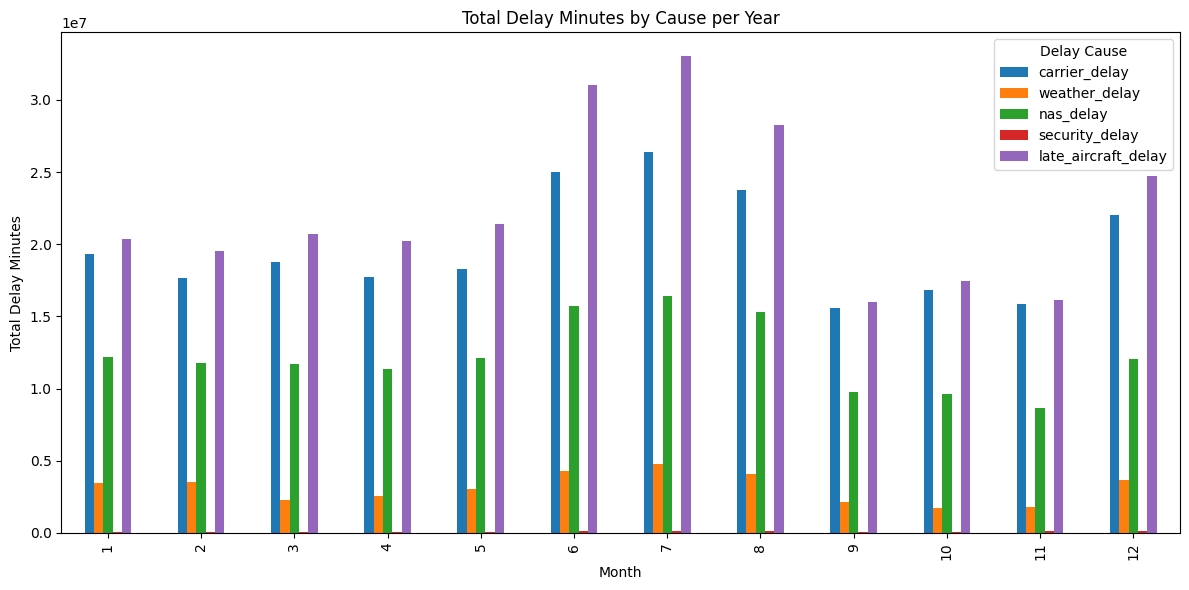

In [ ]:
#total delay minutes cause per year
monthly_delay_min=df.groupby('month')[delay_col].sum().reset_index()
monthly_delay_min.set_index('month').plot(kind='bar', stacked=False, figsize=(12,6))
plt.title("Total Delay Minutes by Cause per Year")
plt.ylabel("Total Delay Minutes")
plt.xlabel("Month")
plt.legend(title="Delay Cause")
plt.tight_layout()
plt.show()

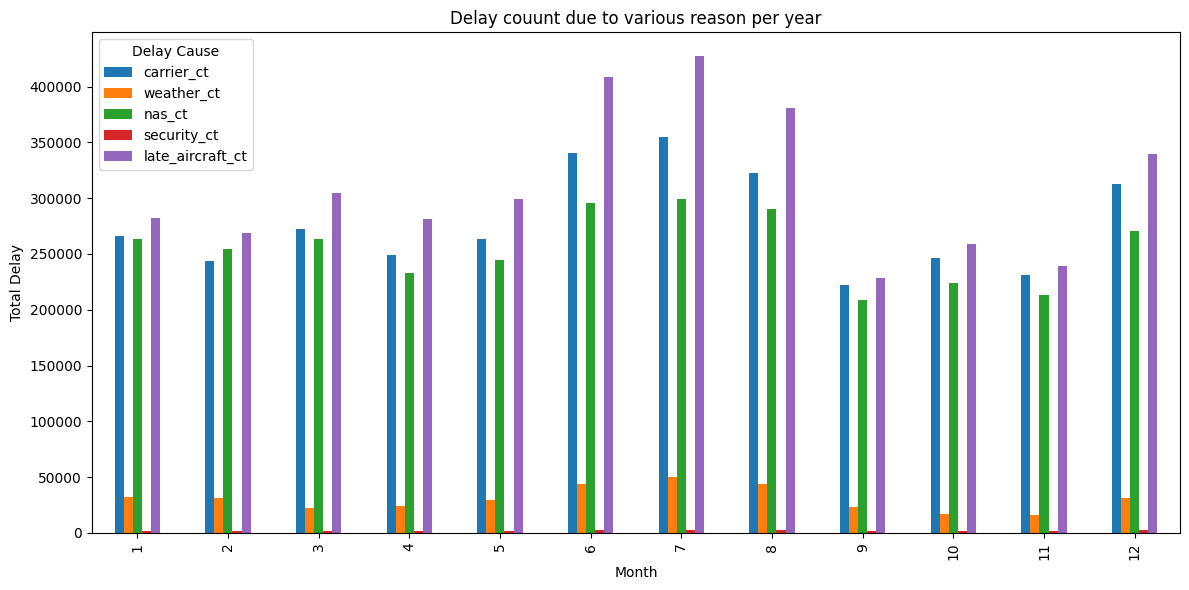

In [ ]:
#delay counts per year due to different reason
monthly_delay_count=df.groupby('month')[count_col].sum().reset_index()
monthly_delay_count.set_index('month').plot(kind='bar', stacked=False, figsize=(12,6))
plt.title("Delay couunt due to various reason per year")
plt.ylabel("Total Delay")
plt.xlabel("Month")
plt.legend(title="Delay Cause")
plt.tight_layout()
plt.show()

In [ ]:
monthly = df.groupby('month')[['arr_flights','arr_del15']].sum().reset_index()
monthly['delay_ratio_total'] = monthly['arr_del15'] / monthly['arr_flights']

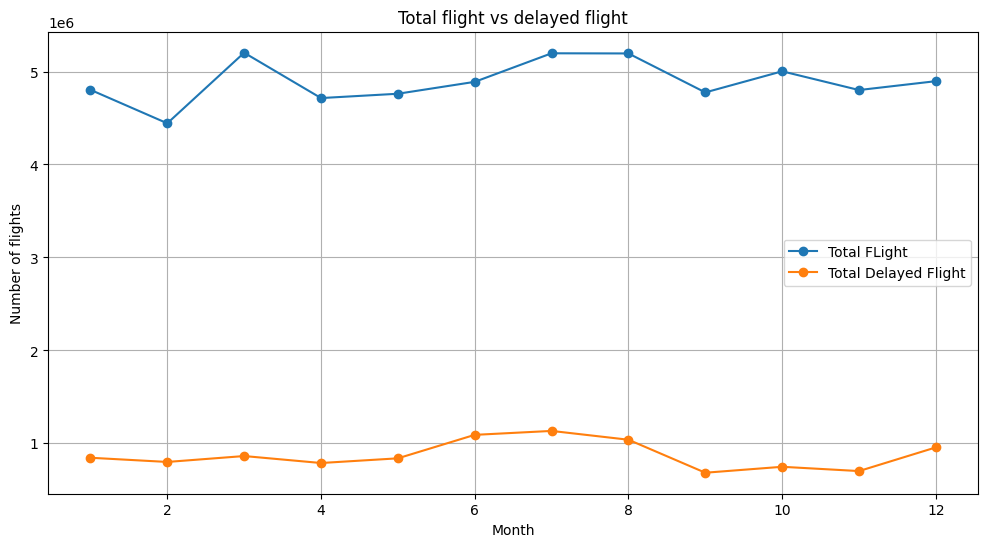

In [ ]:
#total flight vs delayed flight
plt.figure(figsize=(12,6))
plt.plot(monthly['month'],monthly['arr_flights'],label='Total FLight', marker = 'o')
plt.plot(monthly['month'],monthly['arr_del15'],label = 'Total Delayed Flight',marker = 'o')
plt.title('Total flight vs delayed flight')
plt.ylabel('Number of flights')
plt.xlabel('Month')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Ratio of per flight
for col in count_col:
  monthly_delay_count[f'{col}_ratio_total'] = monthly_delay_count[col]/monthly['arr_flights']

# Ratio of per delayed
for col in count_col :
  monthly_delay_count[f'{col}_ratio_delayed'] = monthly_delay_count[f'{col}']/monthly['arr_del15']

# Ratio of per flight
for col in delay_col:
  monthly_delay_min[f'{col}_per_flight']  = monthly_delay_min[f'{col}']/monthly['arr_flights']

# Ratio of per delayed
for col in delay_col:
  monthly_delay_min[f'{col}_cause'] = monthly_delay_min[f'{col}']/monthly['arr_del15']


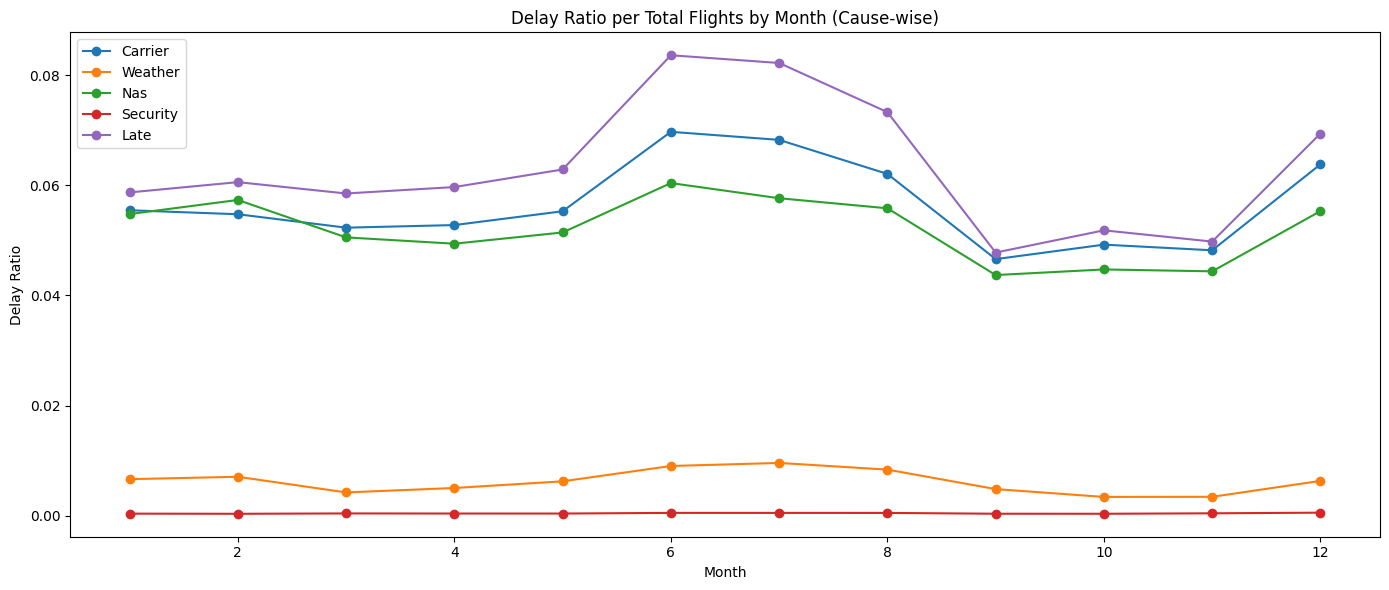

In [ ]:
#month wise delay ration per total flights
plt.figure(figsize=(14, 6))
for reason in monthly_delay_count.columns[6:11].tolist():
    plt.plot(monthly_delay_count['month'], monthly_delay_count[reason], marker='o', label=reason.split('_')[0].capitalize())

plt.title("Delay Ratio per Total Flights by Month (Cause-wise)")
plt.xlabel("Month")
plt.ylabel("Delay Ratio")
plt.legend()
plt.tight_layout()
plt.show()


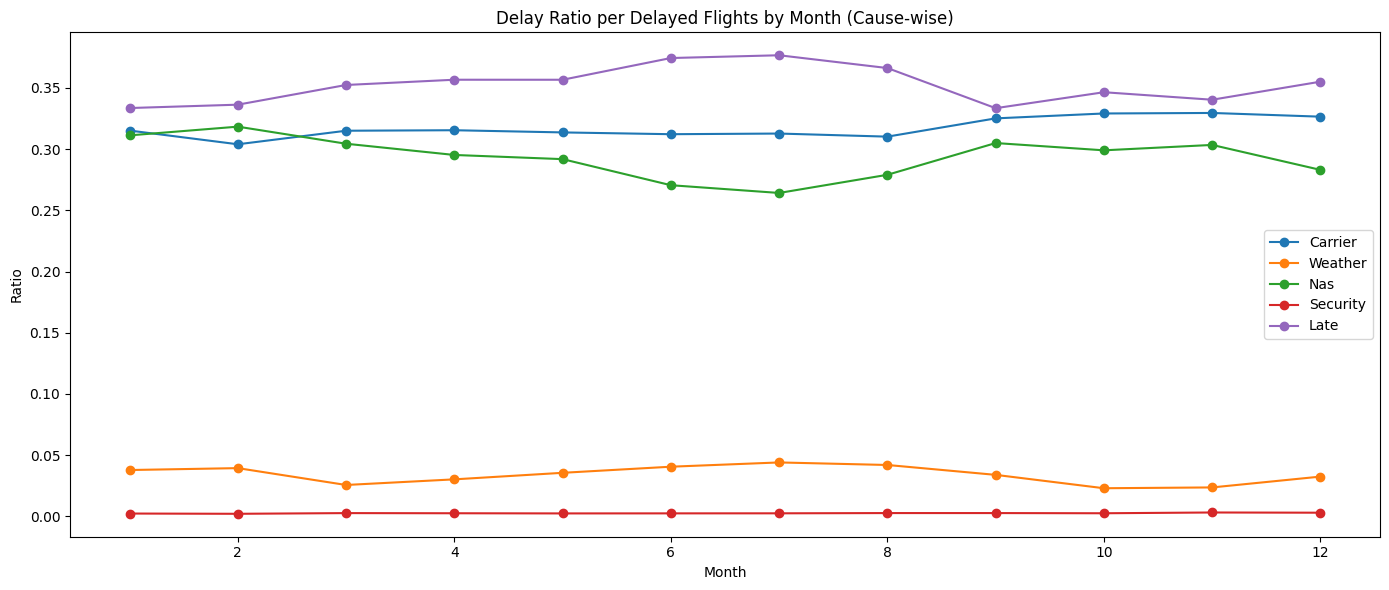

In [ ]:
# per delayed flights
plt.figure(figsize=(14, 6))
for reason in monthly_delay_count.columns[-5:].tolist():
    plt.plot(monthly_delay_count['month'], monthly_delay_count[reason], marker='o', label=reason.split('_')[0].capitalize())

plt.title("Delay Ratio per Delayed Flights by Month (Cause-wise)")
plt.xlabel("Month")
plt.ylabel("Ratio")
plt.legend()
plt.tight_layout()
plt.show()


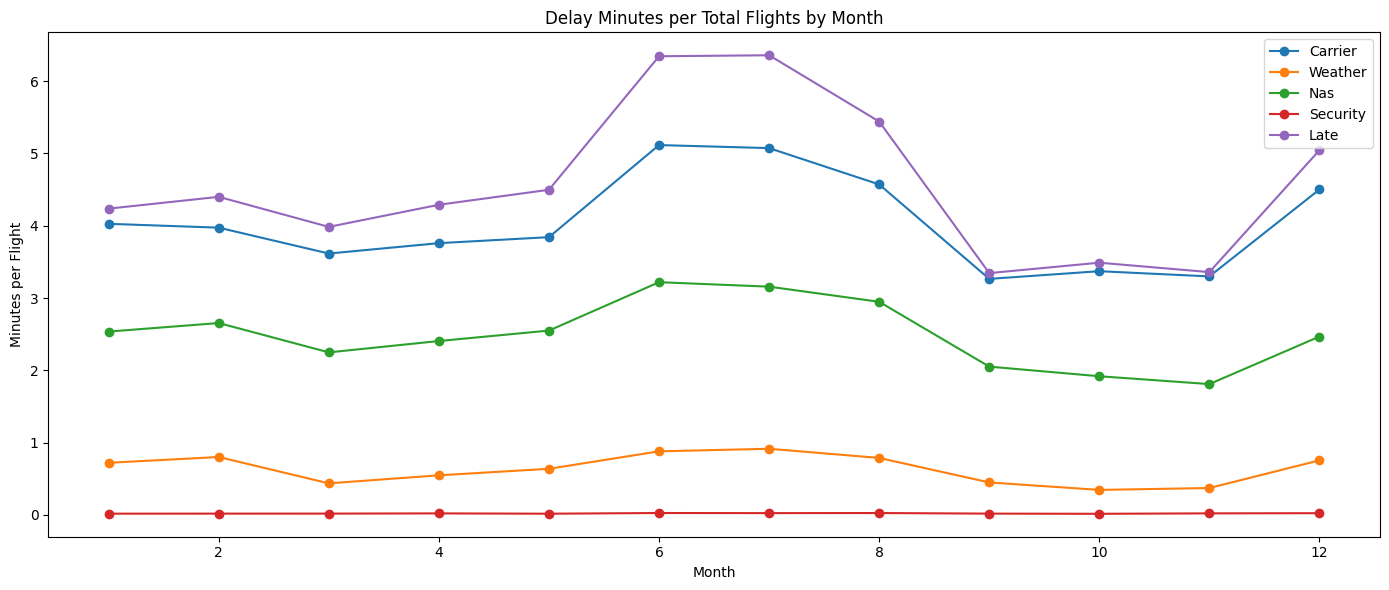

In [ ]:
#delay minutes per total flights by month
plt.figure(figsize=(14, 6))
for reason in monthly_delay_min.columns[6:11].tolist():
    plt.plot(monthly_delay_min['month'], monthly_delay_min[reason], marker='o', label=reason.split('_')[0].capitalize())

plt.title("Delay Minutes per Total Flights by Month")
plt.xlabel("Month")
plt.ylabel("Minutes per Flight")
plt.legend()
plt.tight_layout()
plt.show()

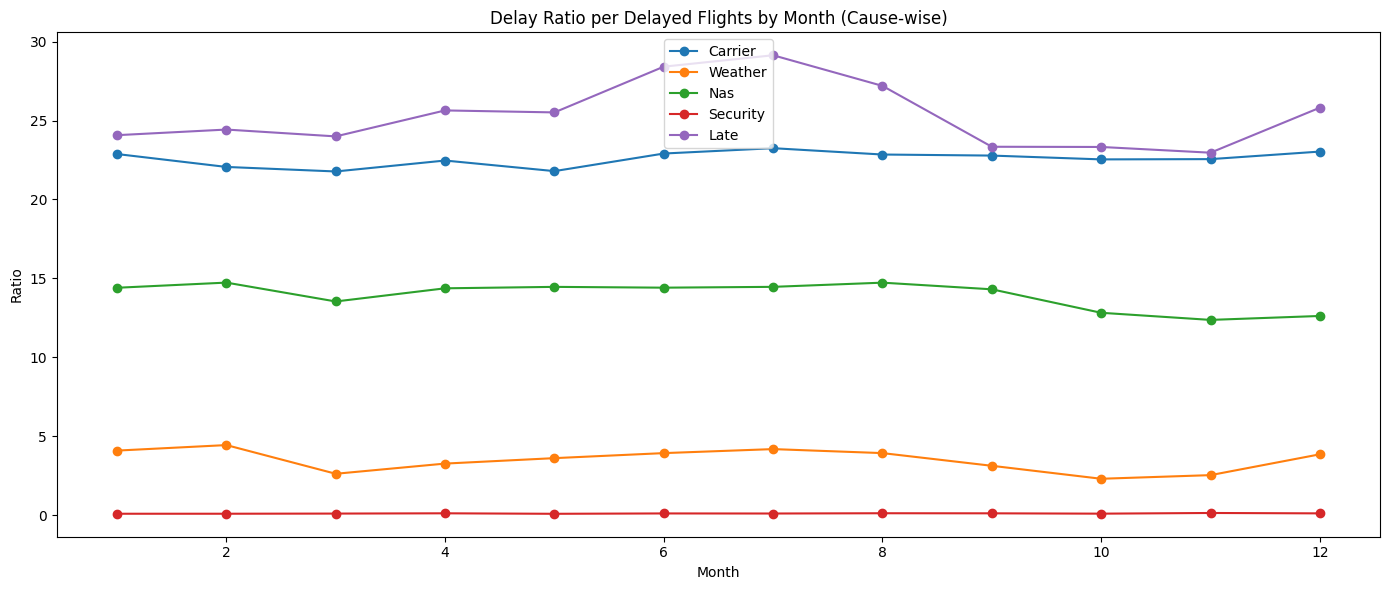

In [ ]:
#delay ratio per delayed flights by month
plt.figure(figsize=(14, 6))
for reason in monthly_delay_min.columns[-5:].tolist():
    plt.plot(monthly_delay_min['month'], monthly_delay_min[reason], marker='o', label=reason.split('_')[0].capitalize())

plt.title("Delay Ratio per Delayed Flights by Month (Cause-wise)")
plt.xlabel("Month")
plt.ylabel("Ratio")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#convert year and month into single datetime
df['year_month'] = pd.to_datetime(df[['year', 'month']].assign(day=1))


In [ ]:
year_month_df = df.groupby('year_month').agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum',
    'carrier_ct': 'sum',
    'weather_ct': 'sum',
    'nas_ct': 'sum',
    'security_ct': 'sum',
    'late_aircraft_ct': 'sum',
    'carrier_delay': 'sum',
    'weather_delay': 'sum',
    'nas_delay': 'sum',
    'security_delay': 'sum',
    'late_aircraft_delay': 'sum'
}).reset_index()


In [ ]:
# Ratio of delayed flights
year_month_df['delay_ratio'] = year_month_df['arr_del15'] / year_month_df['arr_flights']

# Delay minutes per flight
for col in ['carrier', 'weather', 'nas', 'security', 'late_aircraft']:
    year_month_df[f'{col}_min_per_flight'] = year_month_df[f'{col}_delay'] / year_month_df['arr_flights']
    year_month_df[f'{col}_ct_per_flight'] = year_month_df[f'{col}_ct'] / year_month_df['arr_flights']
    year_month_df[f'{col}_ct_ratio'] = year_month_df[f'{col}_ct'] / year_month_df['arr_del15']
    year_month_df[f'{col}_min_ratio'] = year_month_df[f'{col}_delay'] / year_month_df['arr_del15']


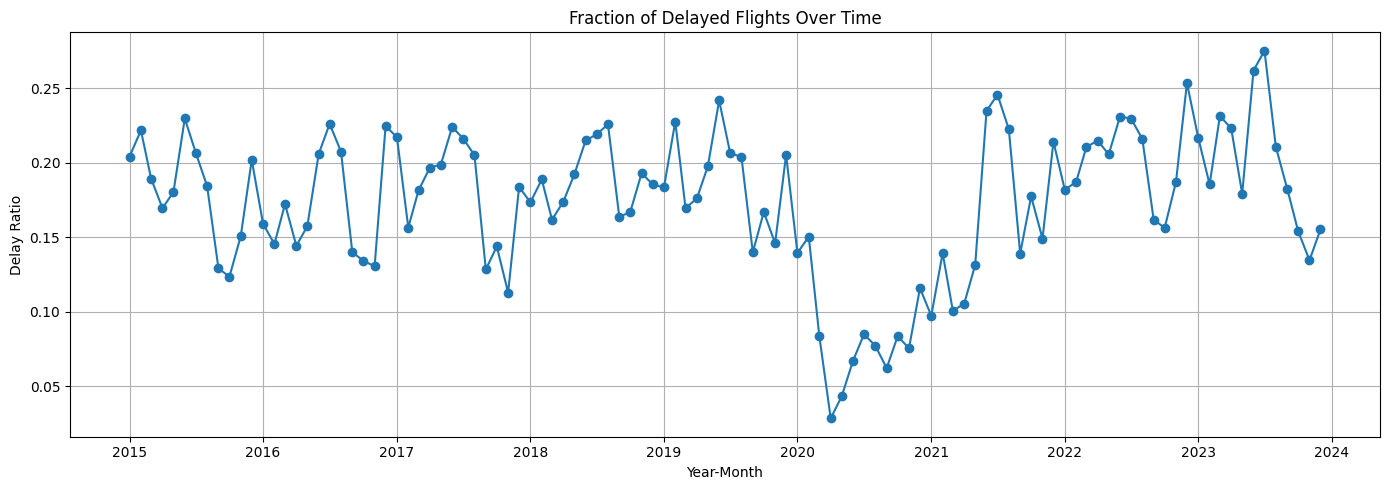

In [ ]:
#delay ratio over time
plt.figure(figsize=(14, 5))
plt.plot(year_month_df['year_month'], year_month_df['delay_ratio'], marker='o')
plt.title("Fraction of Delayed Flights Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Delay Ratio")
plt.grid(True)
plt.tight_layout()
plt.show()


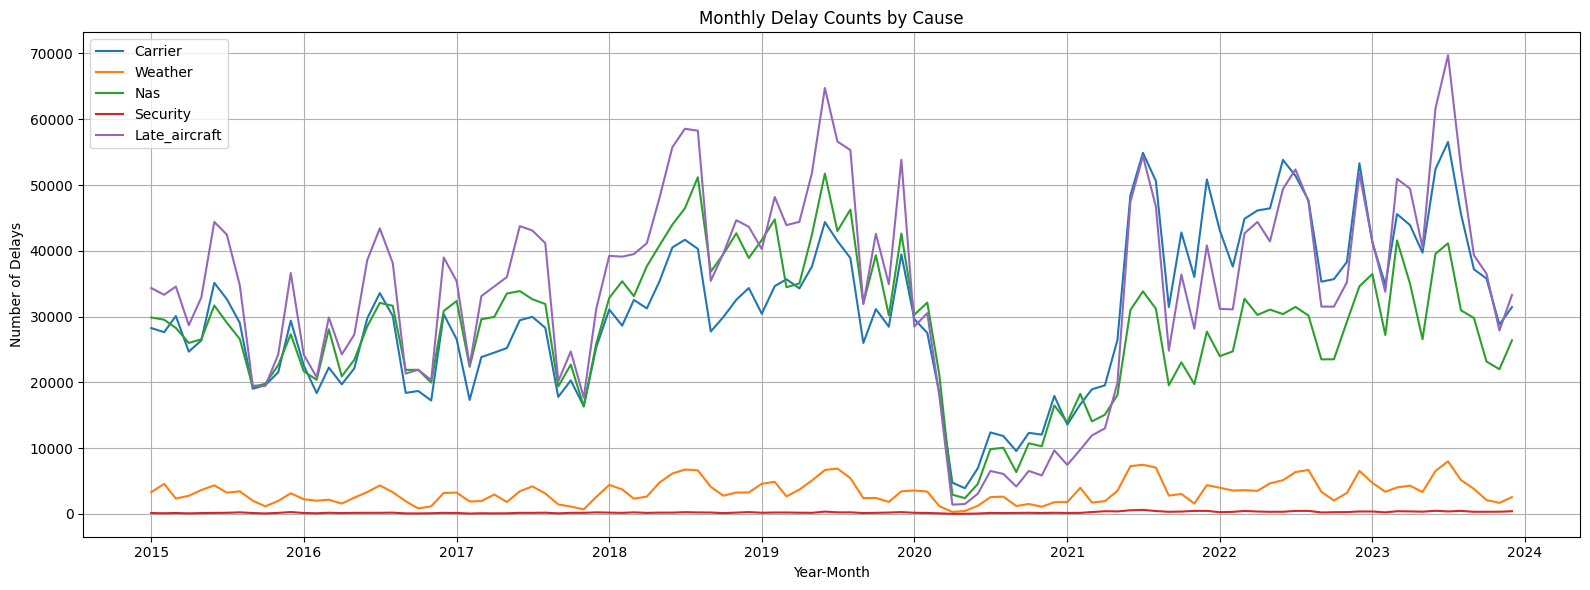

In [ ]:
#delay time by cause over time
plt.figure(figsize=(16, 6))
for col in ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']:
    plt.plot(year_month_df['year_month'], year_month_df[col], label=col.replace('_ct','').capitalize())
plt.title("Monthly Delay Counts by Cause")
plt.xlabel("Year-Month")
plt.ylabel("Number of Delays")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

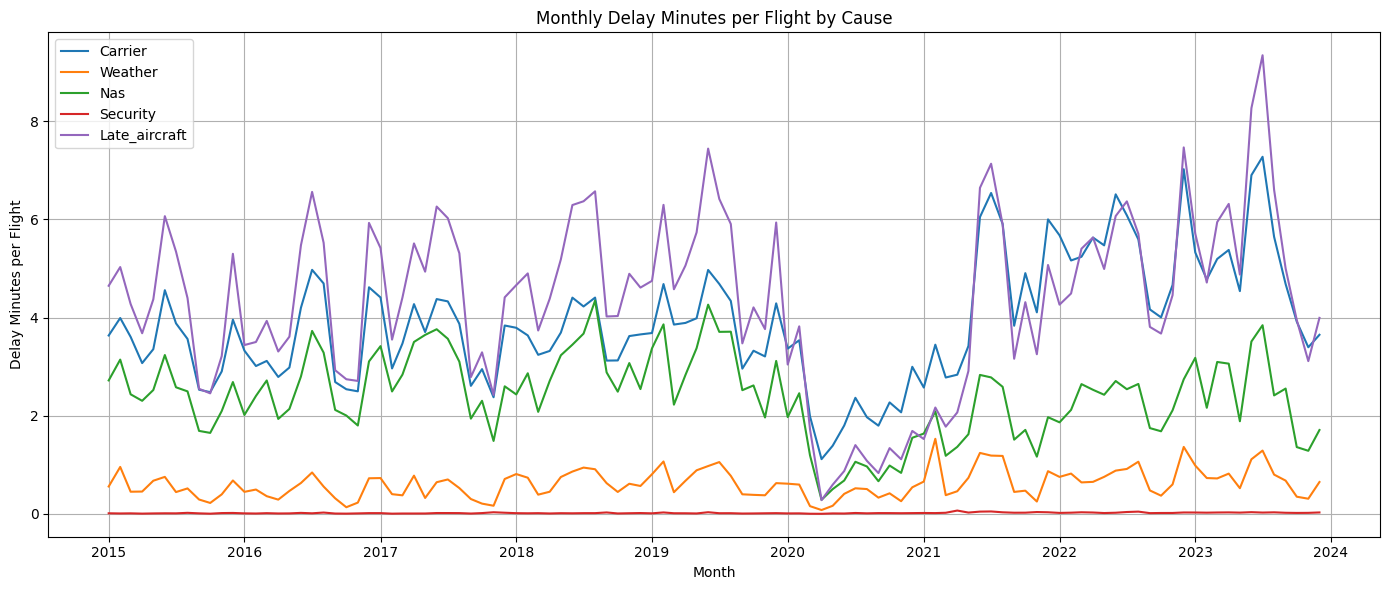

In [ ]:
#delay duration per flight by cause
plt.figure(figsize=(14, 6))

for cause in ['carrier', 'weather', 'nas', 'security', 'late_aircraft']:
    plt.plot(year_month_df['year_month'], year_month_df[f'{cause}_min_per_flight'], label=cause.capitalize())

plt.title('Monthly Delay Minutes per Flight by Cause')
plt.xlabel('Month')
plt.ylabel('Delay Minutes per Flight')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


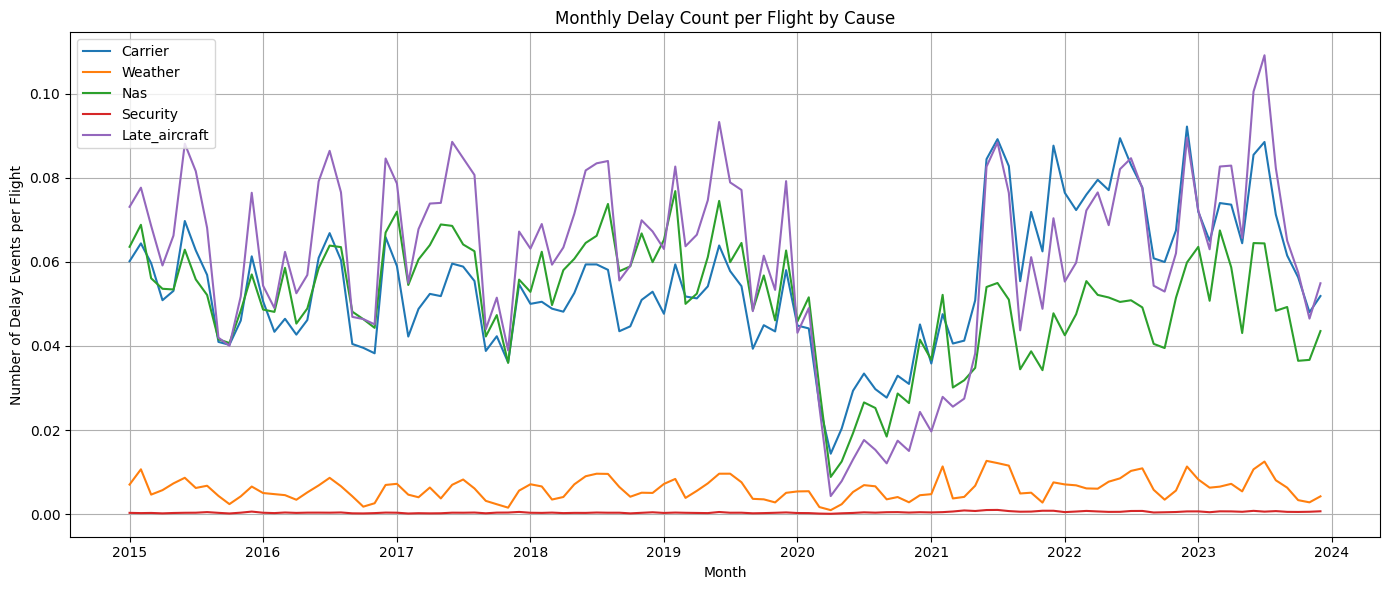

In [ ]:
#delay events per flight by cause
plt.figure(figsize=(14, 6))

for cause in ['carrier', 'weather', 'nas', 'security', 'late_aircraft']:
    plt.plot(year_month_df['year_month'], year_month_df[f'{cause}_ct_per_flight'], label=cause.capitalize())

plt.title('Monthly Delay Count per Flight by Cause')
plt.xlabel('Month')
plt.ylabel('Number of Delay Events per Flight')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

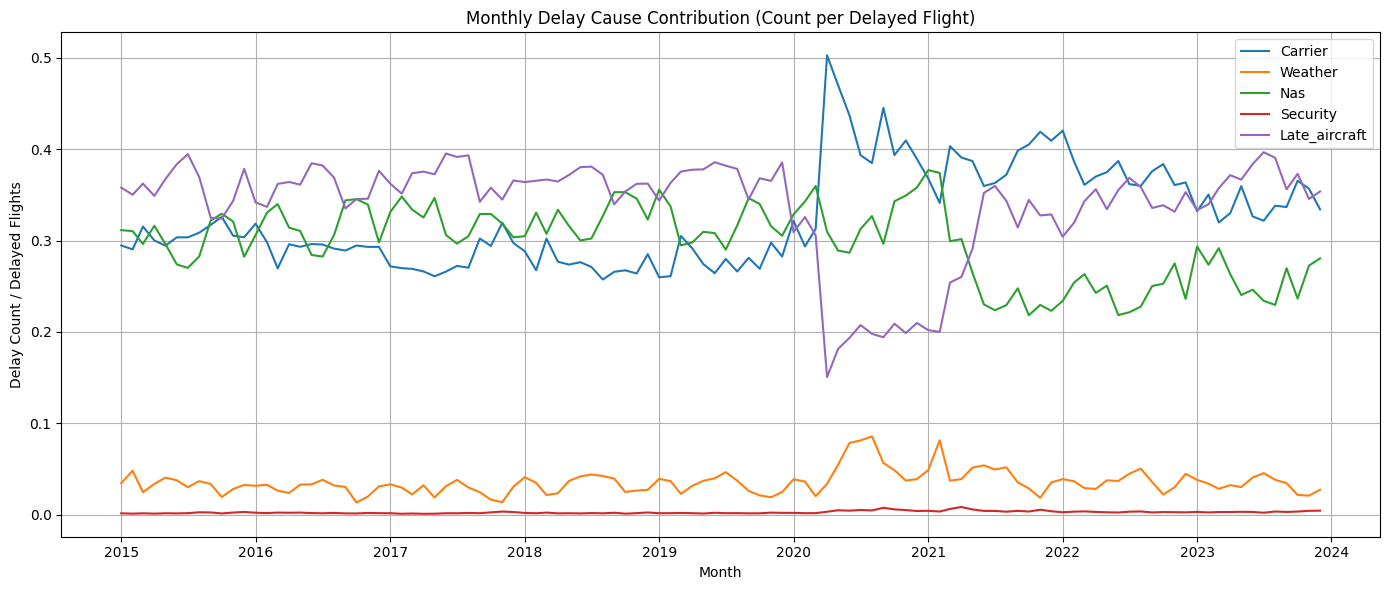

In [ ]:
#ration of delay counts per delayed flight by cause
plt.figure(figsize=(14, 6))

for cause in ['carrier', 'weather', 'nas', 'security', 'late_aircraft']:
    plt.plot( year_month_df['year_month'], year_month_df[f'{cause}_ct_ratio'], label=cause.capitalize())

plt.title('Monthly Delay Cause Contribution (Count per Delayed Flight)')
plt.xlabel('Month')
plt.ylabel('Delay Count / Delayed Flights')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

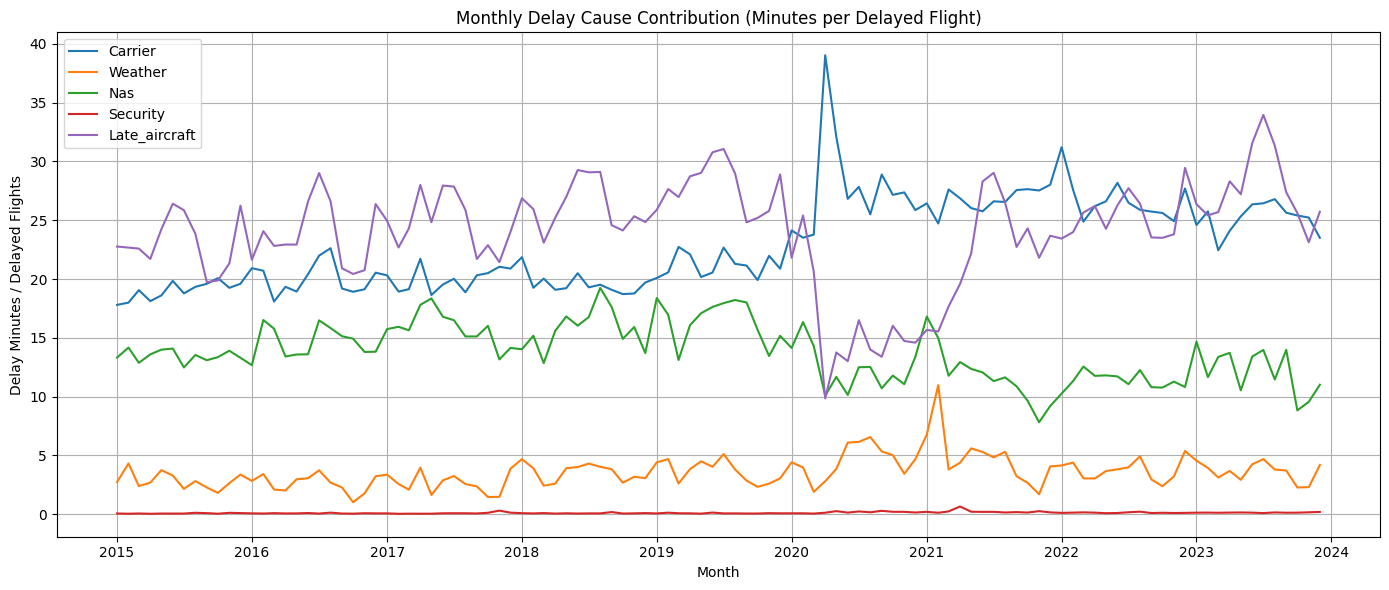

In [ ]:
#ratio of delay minutes per delayed flight by cause
plt.figure(figsize=(14, 6))

for cause in ['carrier', 'weather', 'nas', 'security', 'late_aircraft']:
    plt.plot(year_month_df['year_month'], year_month_df[f'{cause}_min_ratio'], label=cause.capitalize())

plt.title('Monthly Delay Cause Contribution (Minutes per Delayed Flight)')
plt.xlabel('Month')
plt.ylabel('Delay Minutes / Delayed Flights')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

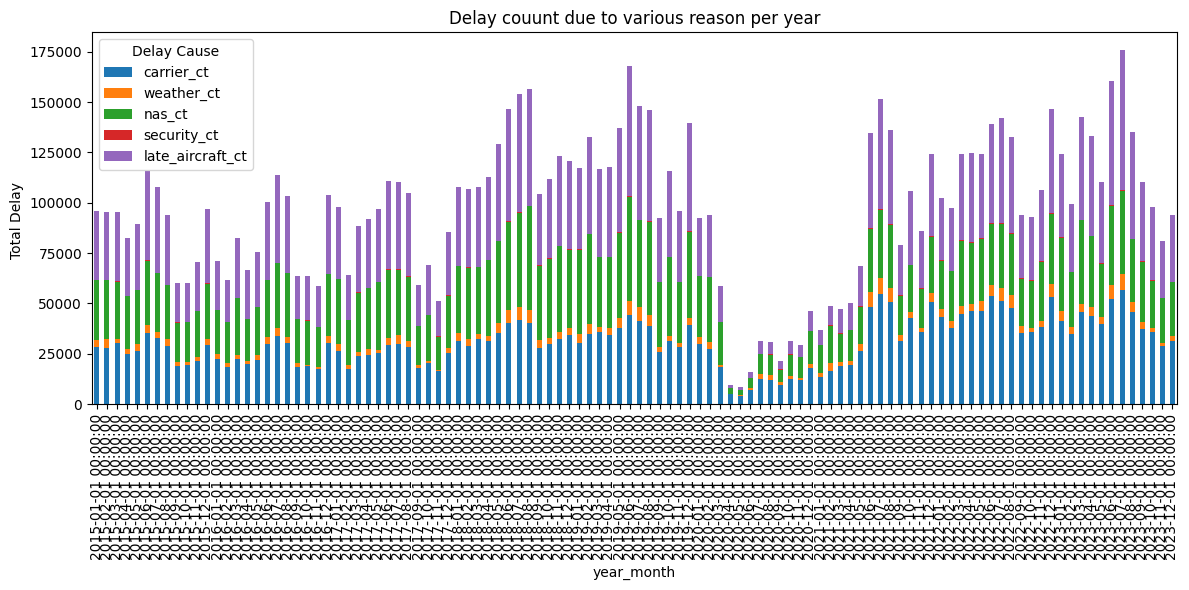

In [ ]:
#year month delay count
year_month_count = df.groupby('year_month')[count_col].sum().reset_index()
year_month_count.set_index('year_month').plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Delay couunt due to various reason per year")
plt.ylabel("Total Delay ")
plt.xlabel("year_month")
plt.legend(title="Delay Cause")
plt.tight_layout()
plt.show()

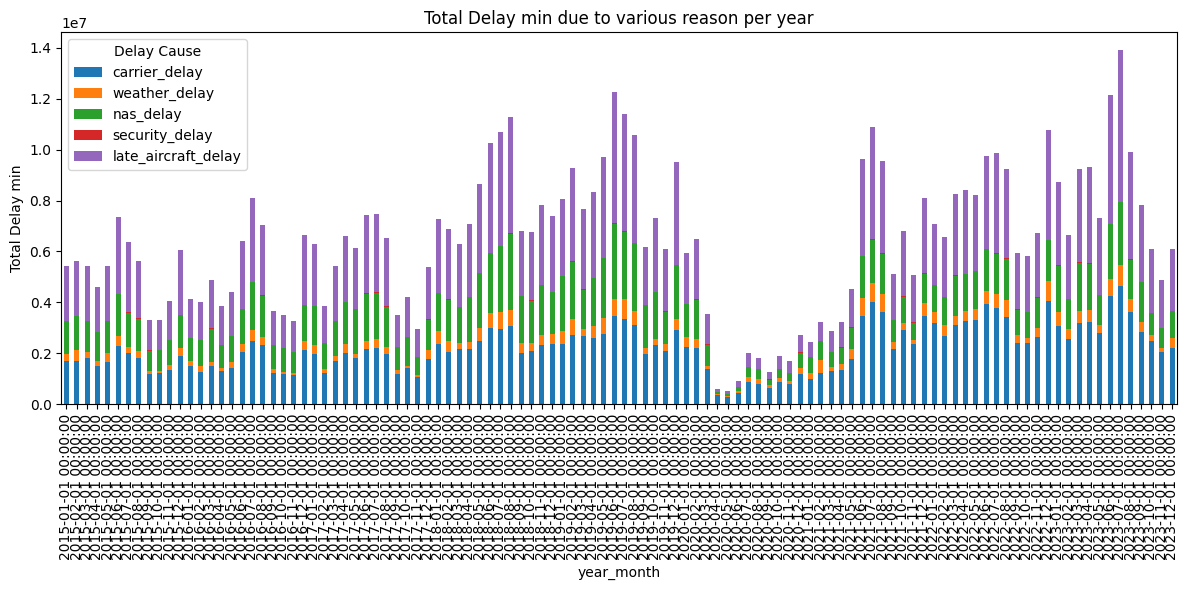

In [ ]:
#year month delay minutes
year_month_delay = df.groupby('year_month')[delay_col].sum().reset_index()
year_month_delay.set_index('year_month').plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Total Delay min due to various reason per year")
plt.ylabel("Total Delay min")
plt.xlabel("year_month")
plt.legend(title="Delay Cause")
plt.tight_layout()
plt.show()

In [ ]:
#flight and delay ratio per airport
airport_summary = df.groupby('airport')[['arr_flights','arr_del15']].sum().reset_index()
airport_summary['delay_ratio']= airport_summary['arr_del15']/airport_summary['arr_flights']
airport_summary.sort_values(by='delay_ratio',ascending=False).head(5)


airport  arr_flights  arr_del15  delay_ratio
391     YNG          2.0        2.0     1.000000
111     DUT       1613.0      655.0     0.406076
65      CDB        262.0       90.0     0.343511
52      BQN      16759.0     5421.0     0.323468
297     PSE       6452.0     1986.0     0.307812

In [ ]:
#total delay minutes per airport
airport_summary_min = df.groupby('airport')[delay_col].sum().reset_index()
airport_summary_min.head()

airport  carrier_delay  weather_delay  nas_delay  security_delay  \
0     ABE       174642.0        42530.0    66883.0           820.0   
1     ABI        38653.0        19096.0    22836.0           293.0   
2     ABQ       759851.0        84419.0   220373.0          3575.0   
3     ABR        27971.0        17389.0     4286.0             0.0   
4     ABY        40515.0        10277.0     9998.0            14.0   

   late_aircraft_delay  
0             173273.0  
1              46256.0  
2             915894.0  
3              10045.0  
4              22250.0

In [ ]:
#total delay count per airport
airport_summary_count = df.groupby('airport')[count_col].sum().reset_index()
airport_summary_count.head()

airport  carrier_ct  weather_ct   nas_ct  security_ct  late_aircraft_ct
0     ABE     2377.38      440.39  1559.50        11.04           2383.78
1     ABI      697.46      207.60   536.56         7.85            768.49
2     ABQ    14086.95     1011.73  5966.53        82.82          15445.83
3     ABR      326.64      101.19   108.77         0.00            132.41
4     ABY      534.67       75.43   230.71         0.61            365.62

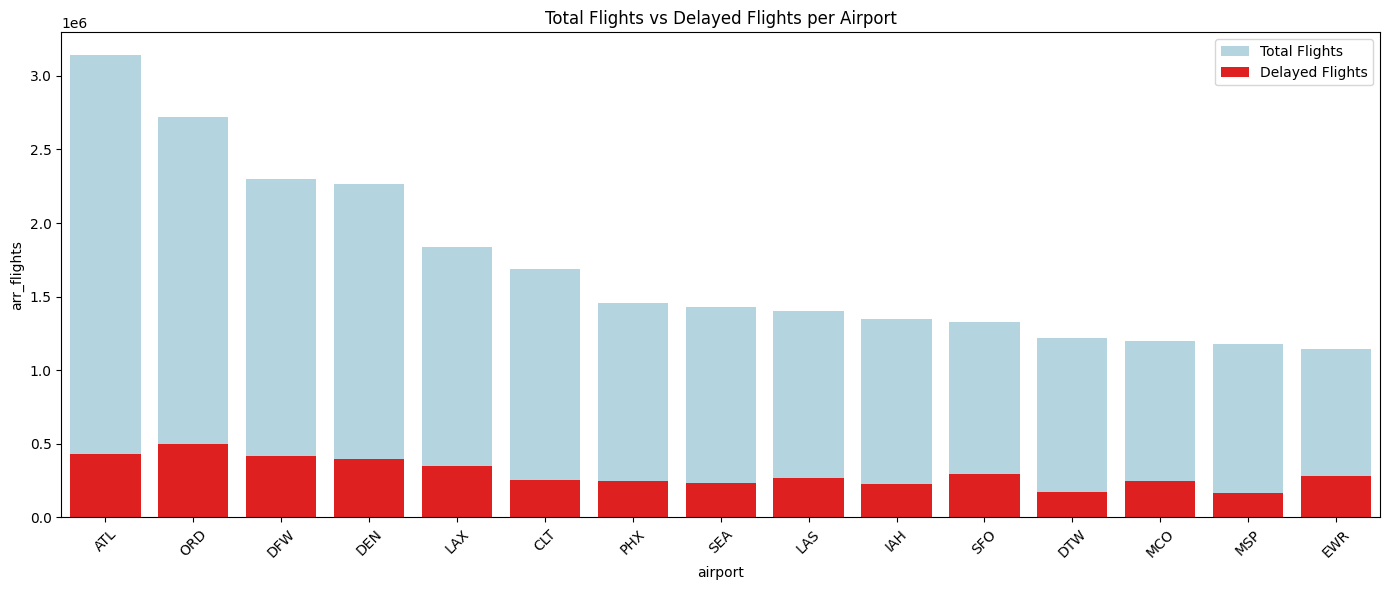

In [ ]:
#total flights vs delayed flights
top_airports = airport_summary.sort_values(by='arr_flights', ascending=False).head(15)

plt.figure(figsize=(14,6))
sns.barplot(x='airport', y='arr_flights', data=top_airports, color='lightblue', label='Total Flights')
sns.barplot(x='airport', y='arr_del15', data=top_airports, color='red', label='Delayed Flights')
plt.title('Total Flights vs Delayed Flights per Airport')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-60-3197937377>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='airport', y='delay_ratio', data=top_ratio, palette='coolwarm')


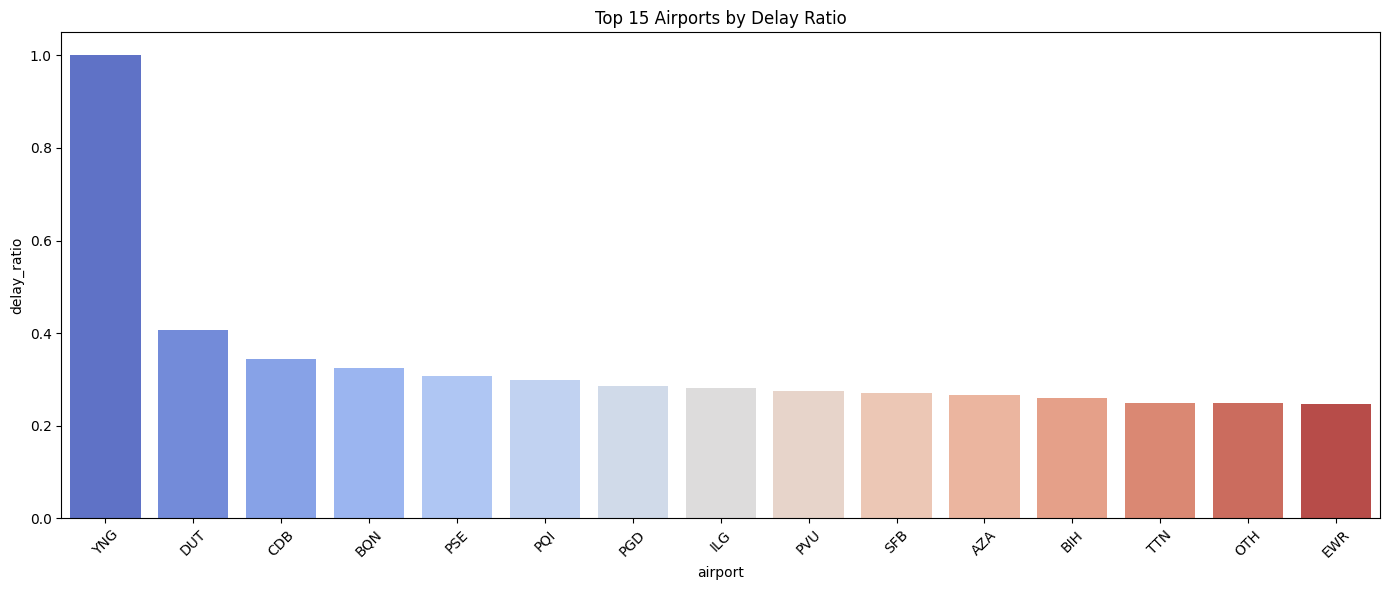

In [ ]:
#delay ratio per airport
top_ratio = airport_summary.sort_values(by='delay_ratio', ascending=False).head(15)

plt.figure(figsize=(14,6))
sns.barplot(x='airport', y='delay_ratio', data=top_ratio, palette='coolwarm')
plt.title('Top 15 Airports by Delay Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

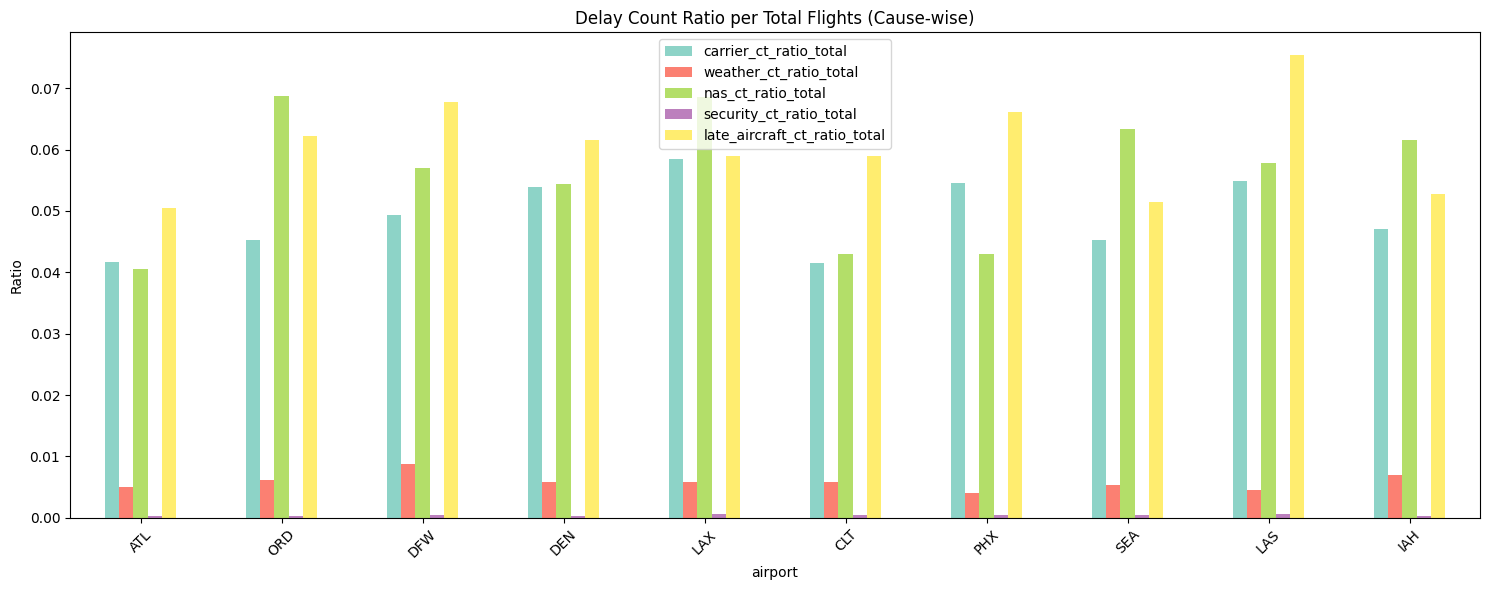

In [ ]:
#delay count ratio per total flights
airport_delay_counts_ratio = airport_summary_count.copy()
airport_delay_counts_ratio['arr_flights'] = airport_summary['arr_flights']
for col in count_col:
    airport_delay_counts_ratio[f'{col}_ratio_total'] = airport_summary_count[col] / airport_summary['arr_flights']

top_airports_ratio = airport_delay_counts_ratio.sort_values(by='arr_flights', ascending=False).head(10)

cause_cols = [f'{c}_ratio_total' for c in count_col]

top_airports_ratio_plot = top_airports_ratio[['airport'] + cause_cols].set_index('airport')

top_airports_ratio_plot.plot(kind='bar', stacked=False, figsize=(15,6), colormap='Set3')
plt.title('Delay Count Ratio per Total Flights (Cause-wise)')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
airport_rca = airport_summary_count.copy()
total_delay_count = airport_rca[count_col].sum(axis=1)

for col in count_col:
    airport_rca[f'{col}_ratio'] = airport_rca[col] / total_delay_count

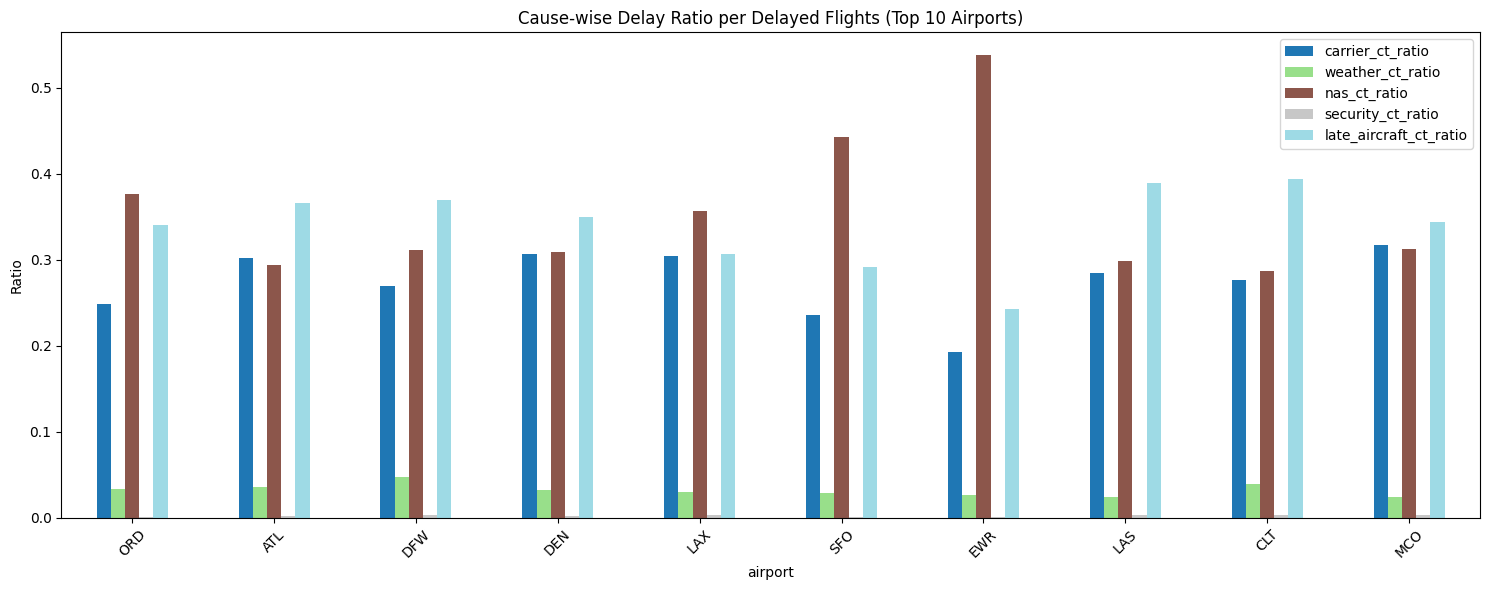

In [ ]:
#delayed count ratio per delayed flights
airport_rca_plot = airport_rca[['airport'] + [f'{c}_ratio' for c in count_col]].set_index('airport')
airport_rca_plot['arr_del15'] = airport_summary.set_index('airport')['arr_del15']
airport_rca_plot = airport_rca_plot.sort_values(by='arr_del15', ascending=False)

airport_rca_plot.drop(columns=['arr_del15'],inplace =True)

airport_rca_plot.head(10).plot(
    kind='bar', stacked=False, figsize=(15,6), colormap='tab20'
)
plt.title('Cause-wise Delay Ratio per Delayed Flights (Top 10 Airports)')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

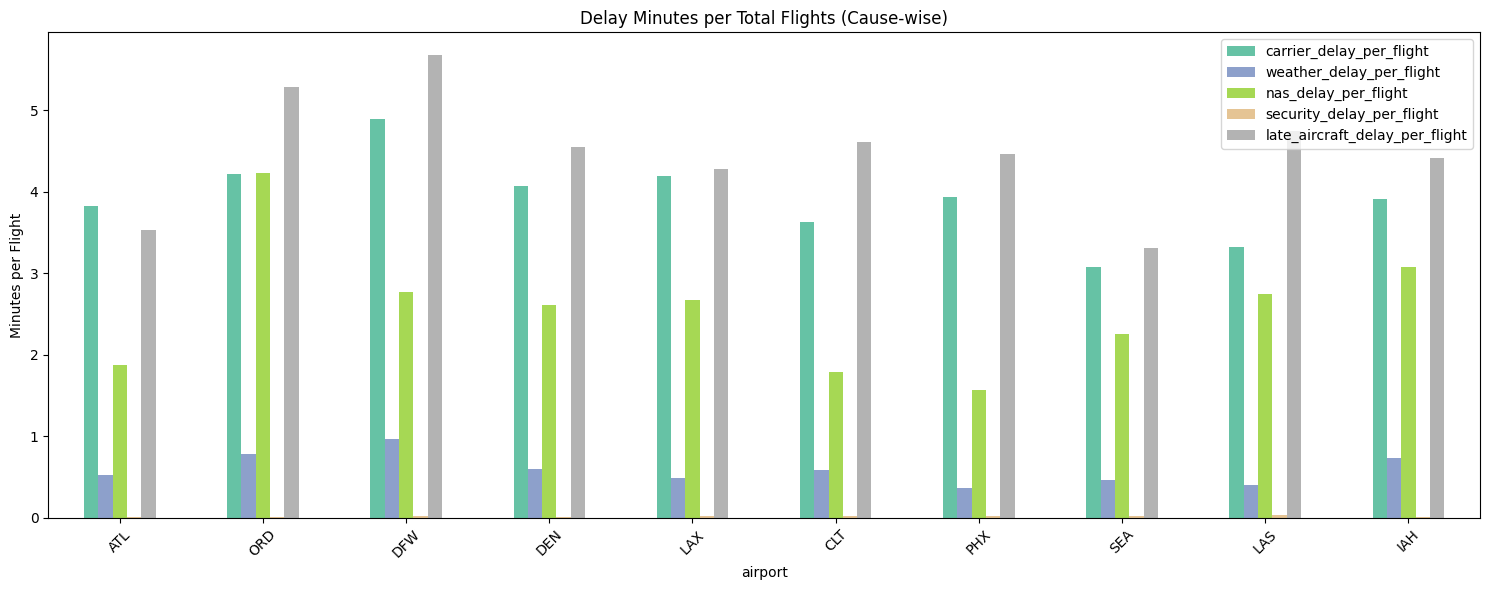

In [ ]:
#delayed minutes per total flights
delay_min_ratio = airport_summary_min.copy()
for col in delay_col:
    delay_min_ratio[f'{col}_per_flight'] = airport_summary_min[col] / airport_summary['arr_flights']

delay_min_ratio['arr_flights'] = airport_summary['arr_flights']

delay_min_ratio = delay_min_ratio.sort_values(by='arr_flights', ascending=False).head(10)
delay_min_ratio.drop(columns = ['arr_flights'], inplace = True)

plot_cols = [f'{c}_per_flight' for c in delay_col]

top_delay_min_plot = delay_min_ratio[['airport'] + plot_cols].set_index('airport')

top_delay_min_plot.plot(kind='bar', stacked=False, figsize=(15,6), colormap='Set2')
plt.title('Delay Minutes per Total Flights (Cause-wise)')
plt.ylabel('Minutes per Flight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


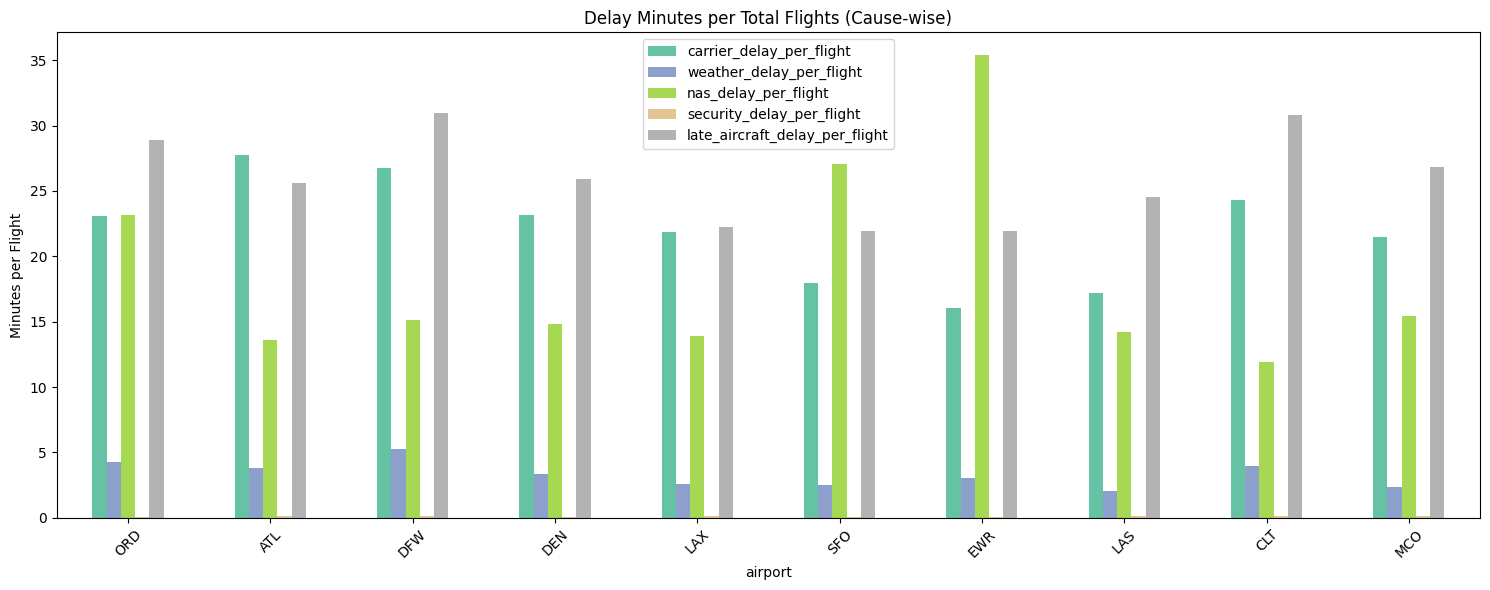

In [ ]:
#delayed minutes per delayed flights
delay_min_ratio = airport_summary_min.copy()
for col in delay_col:
    delay_min_ratio[f'{col}_per_flight'] = airport_summary_min[col] / airport_summary['arr_del15']

delay_min_ratio['arr_del15'] = airport_summary['arr_del15']

delay_min_ratio = delay_min_ratio.sort_values(by='arr_del15', ascending=False).head(10)
delay_min_ratio.drop(columns = ['arr_del15'], inplace = True)

plot_cols = [f'{c}_per_flight' for c in delay_col]

top_delay_min_plot = delay_min_ratio[['airport'] + plot_cols].set_index('airport')

top_delay_min_plot.plot(kind='bar', stacked=False, figsize=(15,6), colormap='Set2')
plt.title('Delay Minutes per Total Flights (Cause-wise)')
plt.ylabel('Minutes per Flight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#most and least delayed airports
# Most delayed
print("Top 5 Most Delayed Airports:")
print(airport_summary.sort_values(by='delay_ratio', ascending=False).head(5))

# Least delayed
print("\nTop 5 Least Delayed Airports:")
print(airport_summary.sort_values(by='delay_ratio', ascending=True).head(5))


Top 5 Most Delayed Airports:
    airport  arr_flights  arr_del15  delay_ratio
391     YNG          2.0        2.0     1.000000
111     DUT       1613.0      655.0     0.406076
65      CDB        262.0       90.0     0.343511
52      BQN      16759.0     5421.0     0.323468
297     PSE       6452.0     1986.0     0.307812

Top 5 Least Delayed Airports:
    airport  arr_flights  arr_del15  delay_ratio
136     FNL          1.0        0.0     0.000000
196     JHM       3099.0      201.0     0.064860
318     ROP        151.0       10.0     0.066225
118     EKO       5165.0      371.0     0.071830
56      BTM       6052.0      465.0     0.076834


<Figure size 1500x600 with 0 Axes>

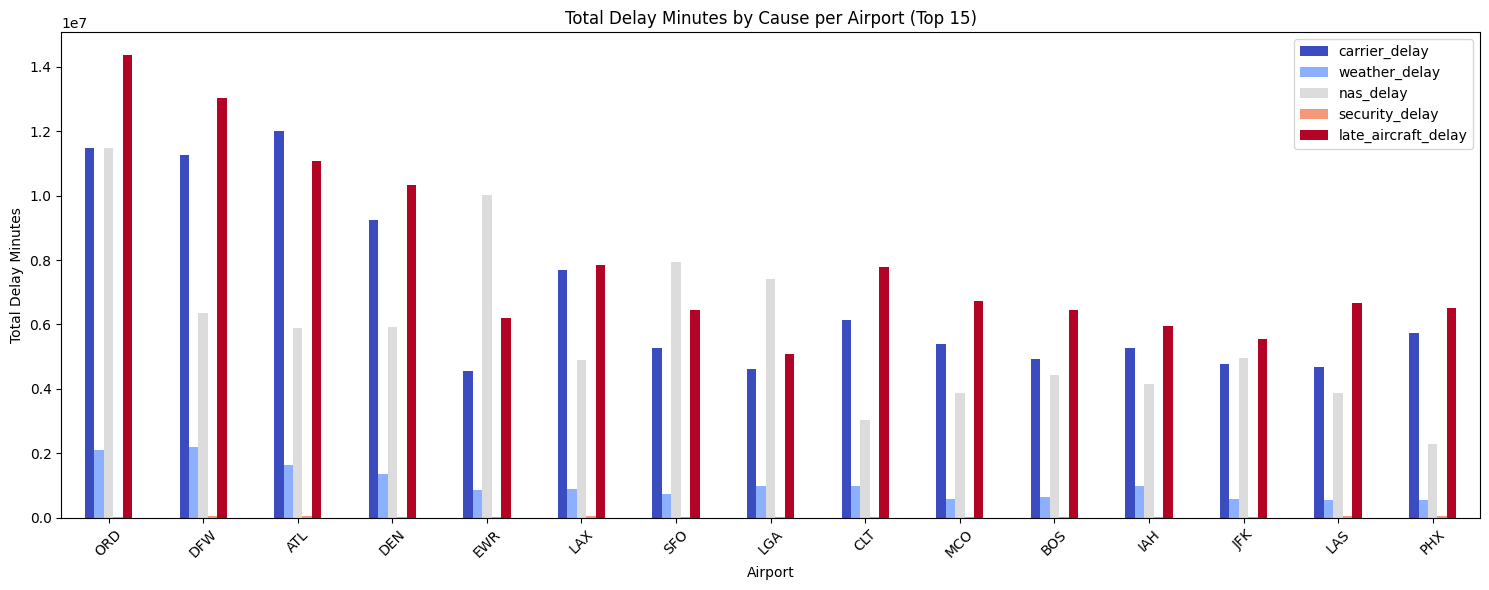

In [ ]:
#total delay minutes by cause per airport

airport_minutes_plot = airport_summary_min.set_index('airport')[delay_col]
top_minutes_airports = airport_minutes_plot.sum(axis=1).sort_values(ascending=False).head(15).index

plt.figure(figsize=(15, 6))
airport_minutes_plot.loc[top_minutes_airports].plot(
    kind='bar', stacked=False, colormap='coolwarm', figsize=(15, 6)
)
plt.title("Total Delay Minutes by Cause per Airport (Top 15)")
plt.ylabel("Total Delay Minutes")
plt.xlabel("Airport")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1500x600 with 0 Axes>

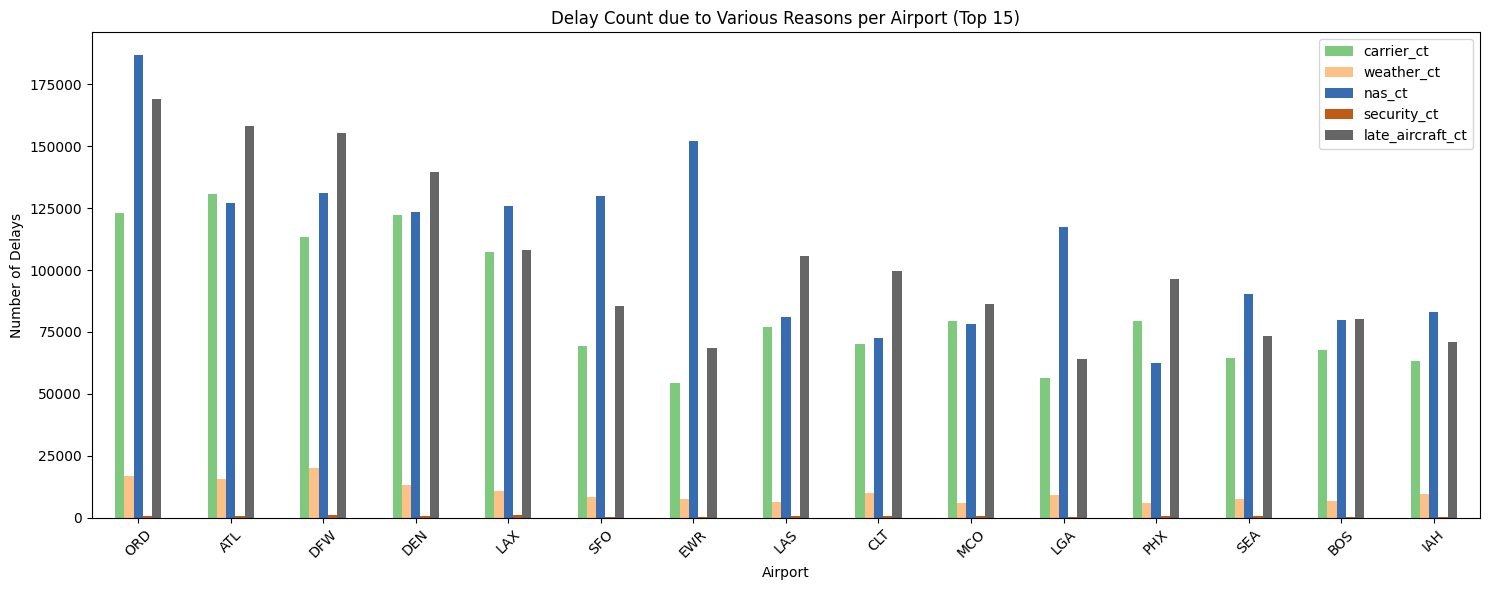

In [ ]:
#delay count due to different reasons per airport
# Stack cause-wise delay counts per airport
airport_counts_plot = airport_summary_count.set_index('airport')[count_col]

# Top 15 airports with most total delay counts
top_counts_airports = airport_counts_plot.sum(axis=1).sort_values(ascending=False).head(15).index

plt.figure(figsize=(15, 6))
airport_counts_plot.loc[top_counts_airports].plot(
    kind='bar', stacked=False, colormap='Accent', figsize=(15, 6)
)
plt.title("Delay Count due to Various Reasons per Airport (Top 15)")
plt.ylabel("Number of Delays")
plt.xlabel("Airport")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Carrier-wise delay analysis

In [ ]:
carrier_summary = df.groupby('carrier').agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum',
    'carrier_ct': 'sum',
    'weather_ct': 'sum',
    'nas_ct': 'sum',
    'security_ct': 'sum',
    'late_aircraft_ct': 'sum',
    'carrier_delay': 'sum',
    'weather_delay': 'sum',
    'nas_delay': 'sum',
    'security_delay': 'sum',
    'late_aircraft_delay': 'sum'
}).reset_index()


In [ ]:
carrier_summary['delay_ratio'] = carrier_summary['arr_del15'] / carrier_summary['arr_flights']

for cause in ['carrier', 'weather', 'nas', 'security', 'late_aircraft']:
    carrier_summary[f'{cause}_ct_per_flight'] = carrier_summary[f'{cause}_ct'] / carrier_summary['arr_flights']
    carrier_summary[f'{cause}_min_per_flight'] = carrier_summary[f'{cause}_delay'] / carrier_summary['arr_flights']
    carrier_summary[f'{cause}_ct_ratio'] = carrier_summary[f'{cause}_ct'] / carrier_summary['arr_del15']
    carrier_summary[f'{cause}_min_ratio'] = carrier_summary[f'{cause}_delay'] / carrier_summary['arr_del15']


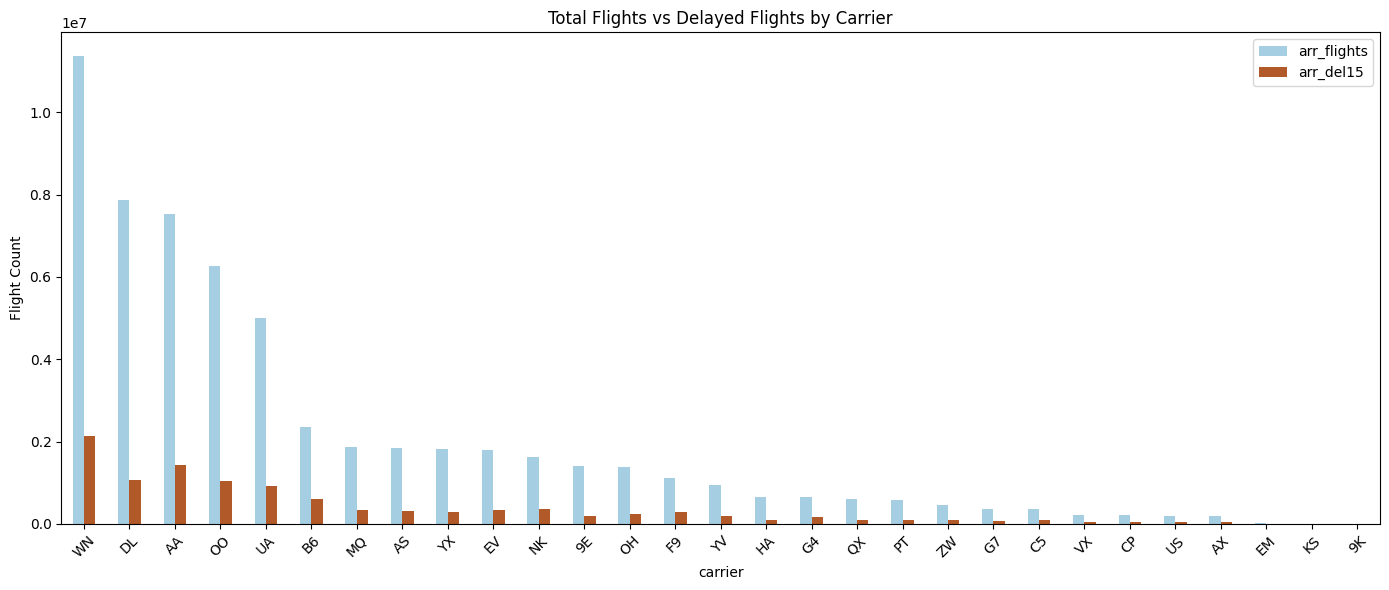

In [ ]:
#total flights vs delayed flights
carrier_summary_sorted = carrier_summary.sort_values(by='arr_flights', ascending=False)

carrier_summary_sorted[['carrier', 'arr_flights', 'arr_del15']].set_index('carrier').plot(
    kind='bar', figsize=(14, 6), colormap='Paired'
)
plt.title('Total Flights vs Delayed Flights by Carrier')
plt.ylabel('Flight Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


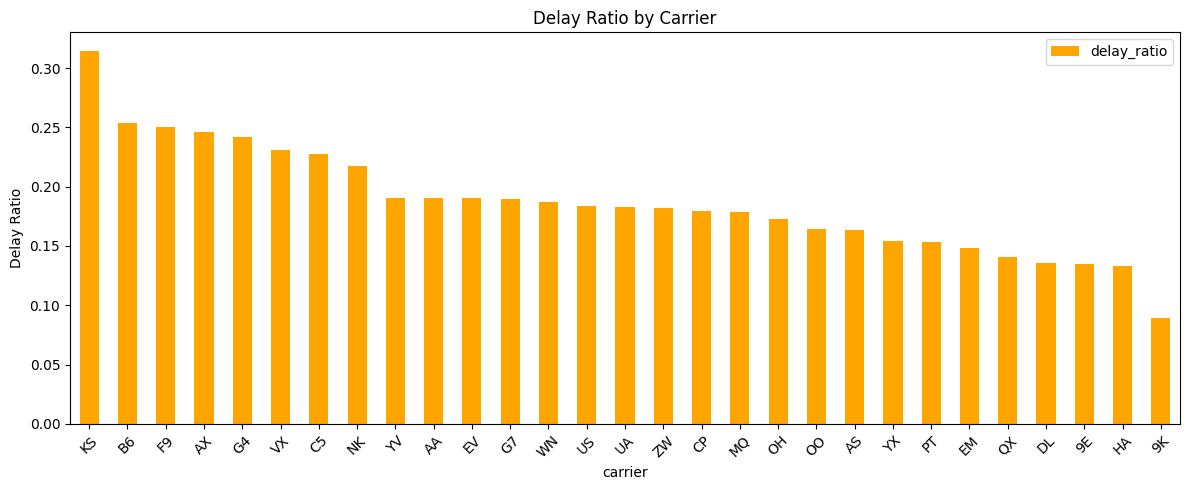

In [ ]:
#delay ratio per carrier
carrier_summary.sort_values(by='delay_ratio', ascending=False).plot(
    x='carrier', y='delay_ratio', kind='bar', figsize=(12, 5), color='orange'
)
plt.title('Delay Ratio by Carrier')
plt.ylabel('Delay Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


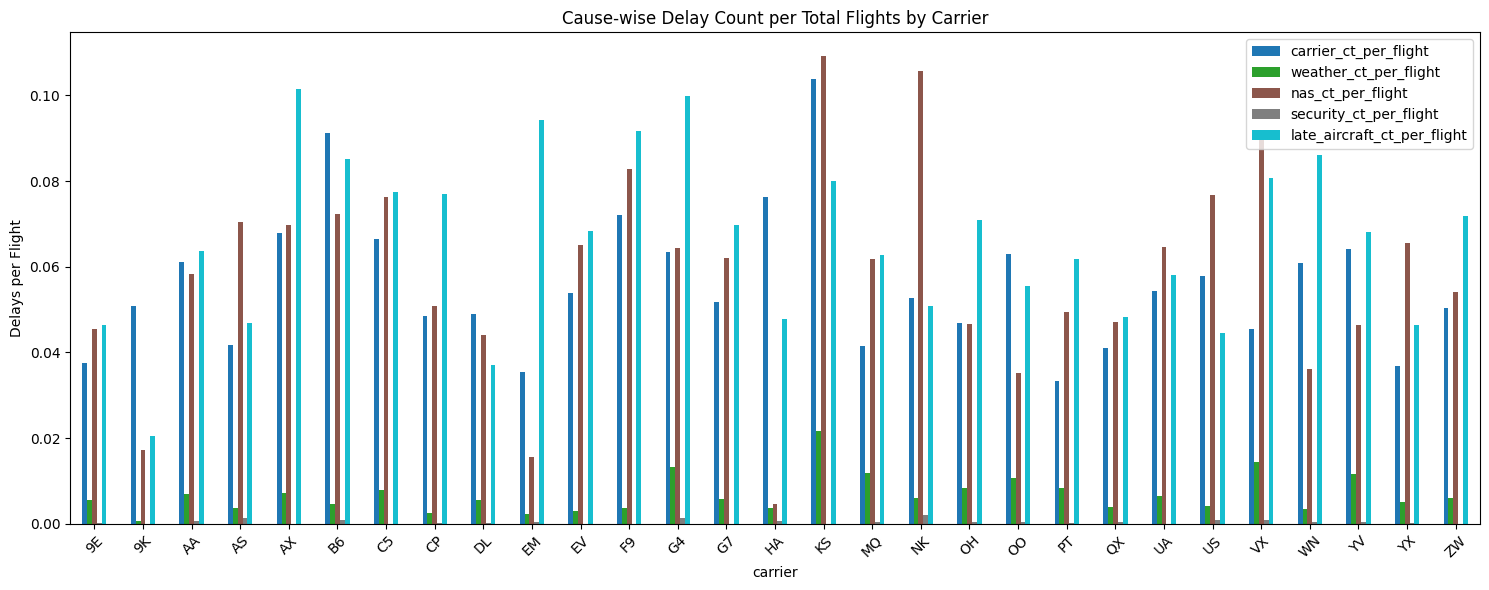

In [ ]:
#cause wise delay count ratio per total flights
count_col = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
count_ratio_total = [f'{c}_ct_per_flight' for c in ['carrier', 'weather', 'nas', 'security', 'late_aircraft']]

carrier_summary[count_ratio_total + ['carrier']].set_index('carrier').plot(
    kind='bar', figsize=(15, 6), colormap='tab10'
)
plt.title('Cause-wise Delay Count per Total Flights by Carrier')
plt.ylabel('Delays per Flight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


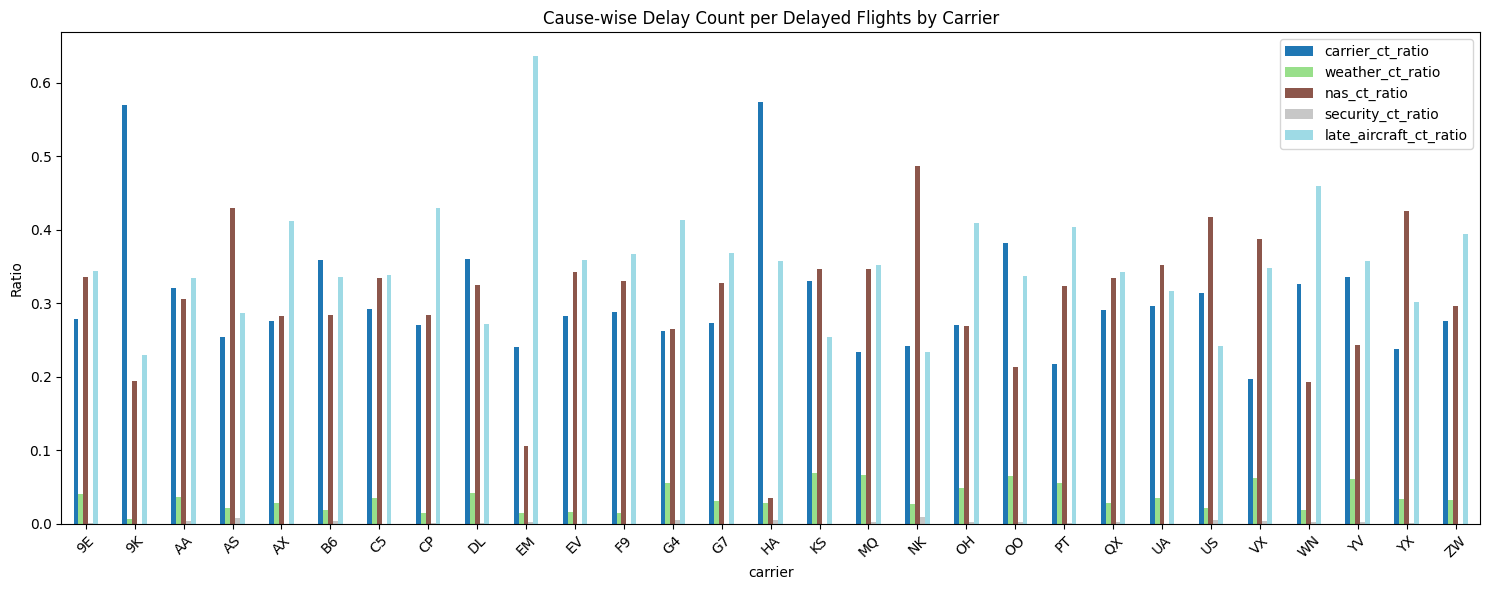

In [ ]:
#cause wise delay count ratio per delayed flights
count_ratio_delayed = [f'{c}_ct_ratio' for c in ['carrier', 'weather', 'nas', 'security', 'late_aircraft']]

carrier_summary[count_ratio_delayed + ['carrier']].set_index('carrier').plot(
    kind='bar', figsize=(15, 6), colormap='tab20')
plt.title('Cause-wise Delay Count per Delayed Flights by Carrier')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


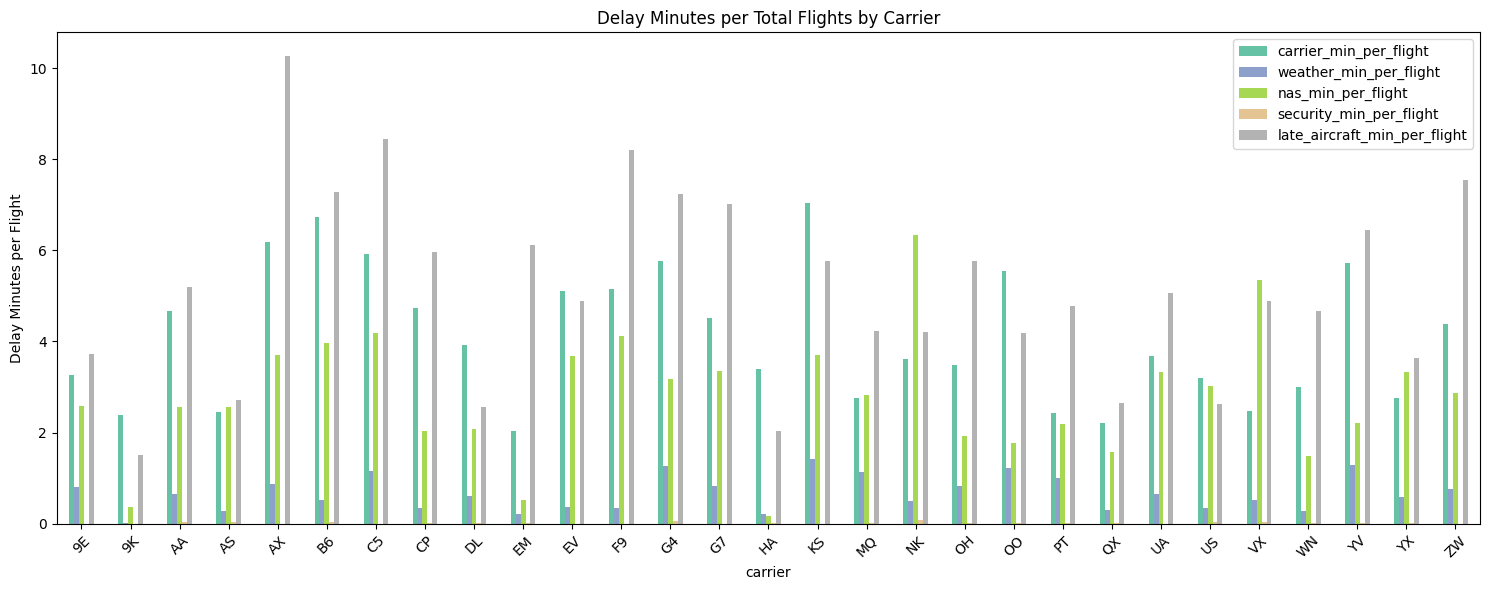

In [ ]:
#cause wise delay minutes per total flights
min_per_flight = [f'{c}_min_per_flight' for c in ['carrier', 'weather', 'nas', 'security', 'late_aircraft']]

carrier_summary[min_per_flight + ['carrier']].set_index('carrier').plot(
    kind='bar', figsize=(15, 6), colormap='Set2')
plt.title('Delay Minutes per Total Flights by Carrier')
plt.ylabel('Delay Minutes per Flight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


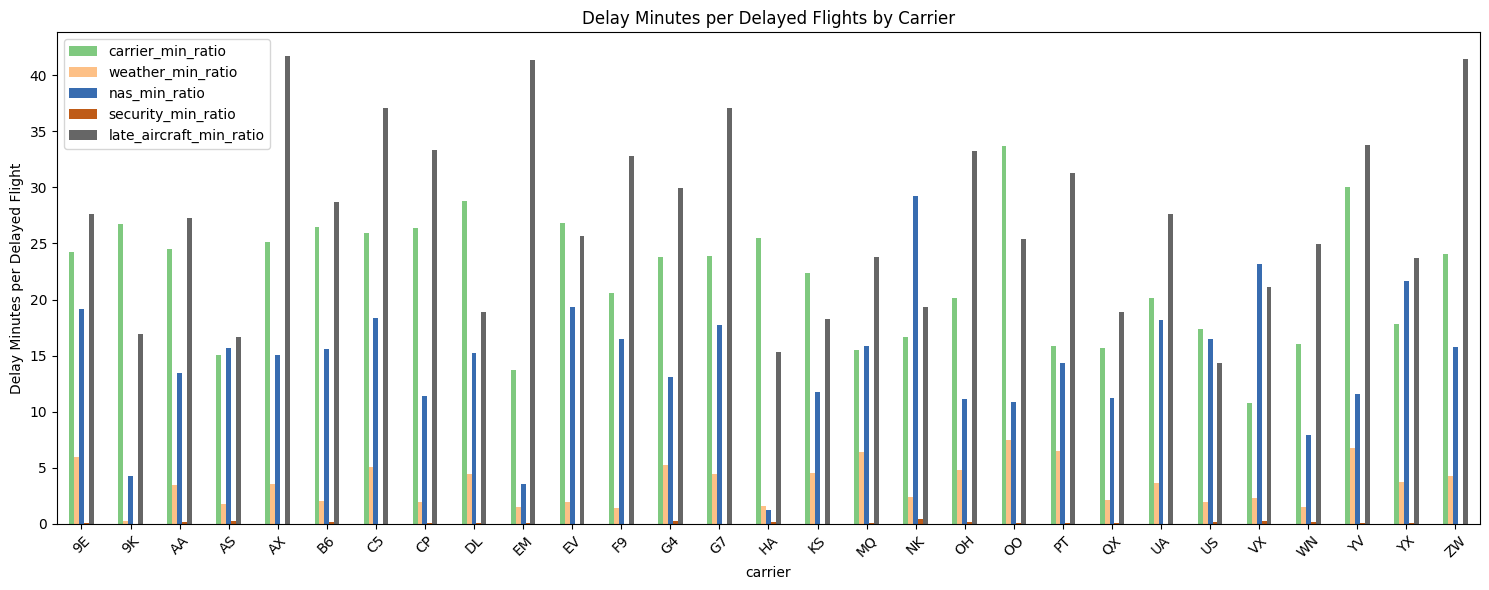

In [ ]:
#cause wise delay minutes per delayed flights
min_per_delayed = [f'{c}_min_ratio' for c in ['carrier', 'weather', 'nas', 'security', 'late_aircraft']]

carrier_summary[min_per_delayed + ['carrier']].set_index('carrier').plot(
    kind='bar', figsize=(15, 6), colormap='Accent')
plt.title('Delay Minutes per Delayed Flights by Carrier')
plt.ylabel('Delay Minutes per Delayed Flight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Max and Min Insights for Carrier wise RCA

In [ ]:
#delay ratio
max_delay_ratio = carrier_summary.loc[carrier_summary['delay_ratio'].idxmax()]
min_delay_ratio = carrier_summary.loc[carrier_summary['delay_ratio'].idxmin()]

#most and least delayed flights
max_delayed = carrier_summary.loc[carrier_summary['arr_del15'].idxmax()]
min_delayed = carrier_summary.loc[carrier_summary['arr_del15'].idxmin()]

#most and least total flights
max_flights = carrier_summary.loc[carrier_summary['arr_flights'].idxmax()]
min_flights = carrier_summary.loc[carrier_summary['arr_flights'].idxmin()]


In [ ]:
#max cause wise delay ratios
for cause in ['carrier', 'weather', 'nas', 'security', 'late_aircraft']:
    max_ratio = carrier_summary.loc[carrier_summary[f'{cause}_ct_ratio'].idxmax()]
    min_ratio = carrier_summary.loc[carrier_summary[f'{cause}_ct_ratio'].idxmin()]
    print(f"{cause.upper()} Delay Ratio - Max: {max_ratio['carrier']}, Min: {min_ratio['carrier']}")


CARRIER Delay Ratio - Max: HA, Min: VX
WEATHER Delay Ratio - Max: KS, Min: 9K
NAS Delay Ratio - Max: NK, Min: HA
SECURITY Delay Ratio - Max: NK, Min: 9K
LATE_AIRCRAFT Delay Ratio - Max: EM, Min: 9K


In [ ]:
#max and min delay minutes per delayed flights
for cause in ['carrier', 'weather', 'nas', 'security', 'late_aircraft']:
    max_min = carrier_summary.loc[carrier_summary[f'{cause}_min_ratio'].idxmax()]
    min_min = carrier_summary.loc[carrier_summary[f'{cause}_min_ratio'].idxmin()]
    print(f"{cause.upper()} Delay Minutes/Delayed Flights - Max: {max_min['carrier']}, Min: {min_min['carrier']}")


CARRIER Delay Minutes/Delayed Flights - Max: OO, Min: VX
WEATHER Delay Minutes/Delayed Flights - Max: OO, Min: 9K
NAS Delay Minutes/Delayed Flights - Max: NK, Min: HA
SECURITY Delay Minutes/Delayed Flights - Max: NK, Min: 9K
LATE_AIRCRAFT Delay Minutes/Delayed Flights - Max: AX, Min: US


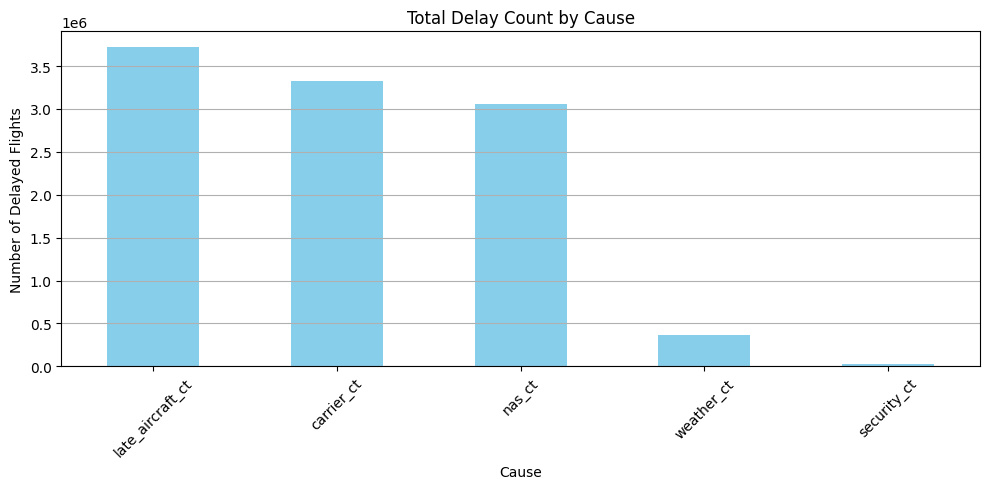

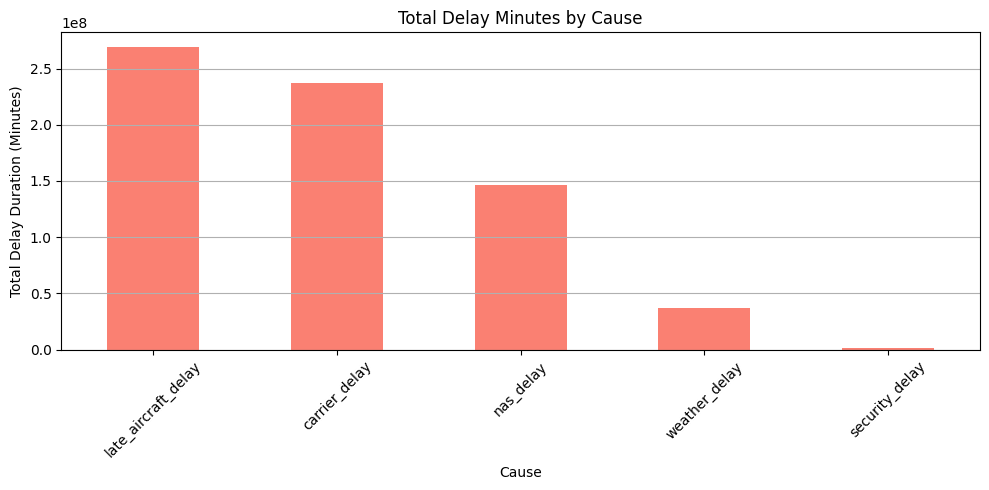

In [ ]:
total_delay_counts = df[count_col].sum().sort_values(ascending=False)

total_delay_counts.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Total Delay Count by Cause')
plt.ylabel('Number of Delayed Flights')
plt.xlabel('Cause')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Sum of delay durations
total_delay_minutes = df[delay_col].sum().sort_values(ascending=False)

# Plotting
total_delay_minutes.plot(kind='bar', figsize=(10,5), color='salmon')
plt.title('Total Delay Minutes by Cause')
plt.ylabel('Total Delay Duration (Minutes)')
plt.xlabel('Cause')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Group by Year and Carrier
carrier_yearly = df.groupby(['year', 'carrier']).agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum'
}).reset_index()

# Add delay ratio
carrier_yearly['delay_ratio'] = carrier_yearly['arr_del15'] / carrier_yearly['arr_flights']

# Get top carrier per year based on delay ratio
top_carrier_by_year = carrier_yearly.loc[carrier_yearly.groupby('year')['delay_ratio'].idxmax()]


#Group by Year and Airport
airport_yearly = df.groupby(['year', 'airport']).agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum'
}).reset_index()

airport_yearly['delay_ratio'] = airport_yearly['arr_del15'] / airport_yearly['arr_flights']

top_airport_by_year = airport_yearly.loc[airport_yearly.groupby('year')['delay_ratio'].idxmax()]



# Group by year and sum delay causes
delay_causes = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
cause_by_year = df.groupby('year')[delay_causes].sum()

# Find cause with max count per year
top_cause_by_year = cause_by_year.idxmax(axis=1)
top_cause_counts = cause_by_year.max(axis=1)

top_cause_summary = pd.DataFrame({
    'top_cause': top_cause_by_year,
    'cause_count': top_cause_counts
})

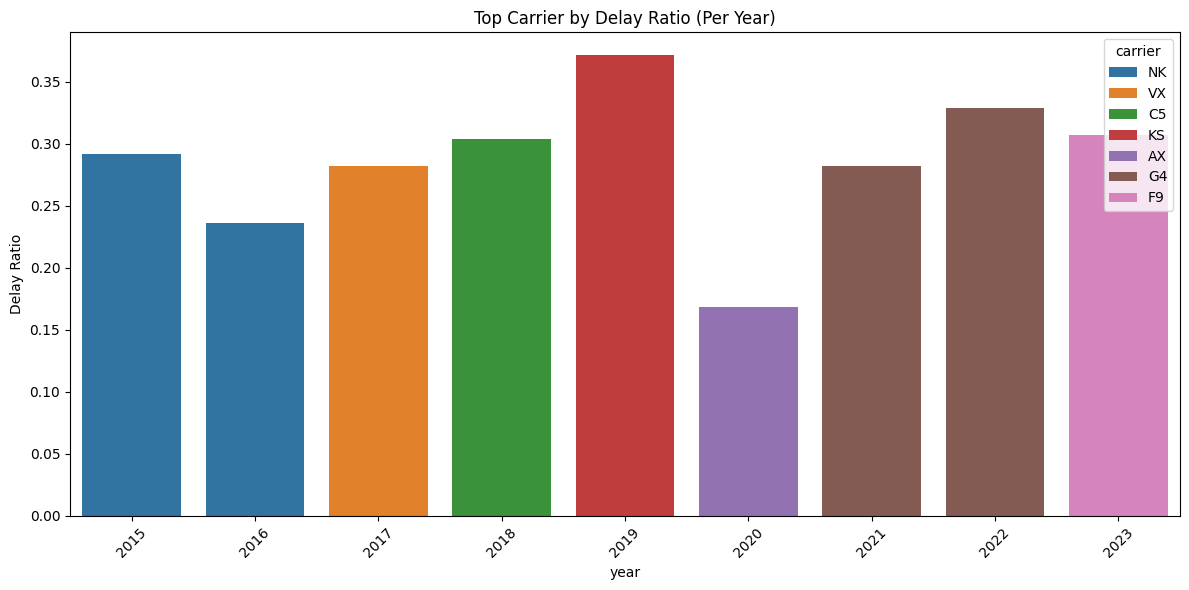

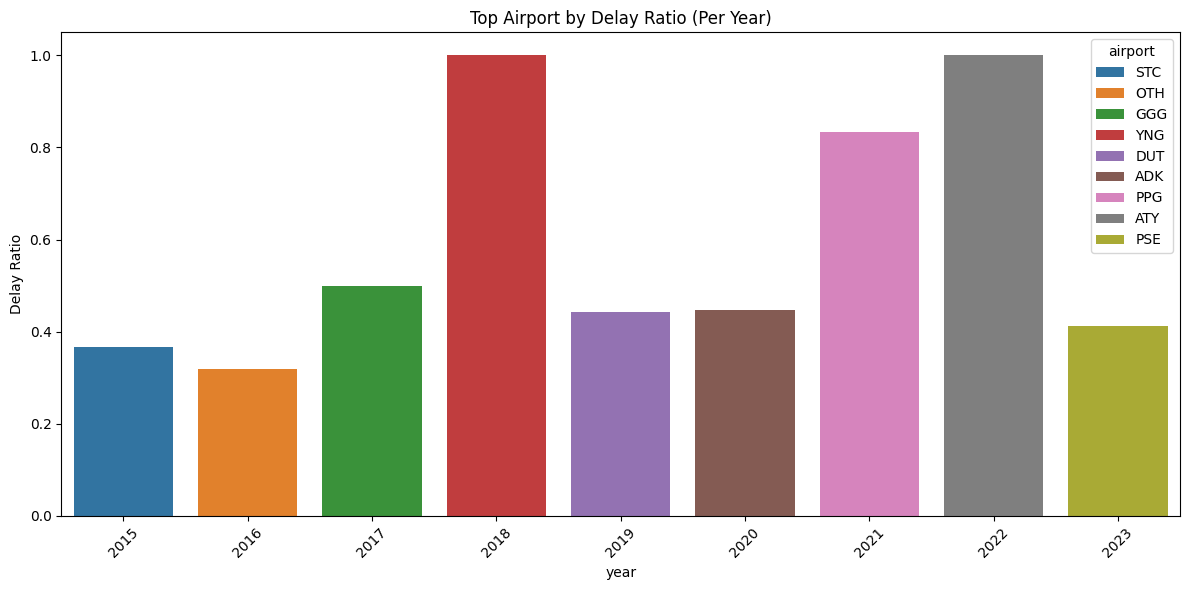

In [ ]:
#top carrier by delay ratio per year
plt.figure(figsize=(12,6))
sns.barplot(data=top_carrier_by_year, x='year', y='delay_ratio', hue='carrier')
plt.title('Top Carrier by Delay Ratio (Per Year)')
plt.ylabel('Delay Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#top airport by delay ratio per year
plt.figure(figsize=(12,6))
sns.barplot(data=top_airport_by_year, x='year', y='delay_ratio', hue='airport')
plt.title('Top Airport by Delay Ratio (Per Year)')
plt.ylabel('Delay Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


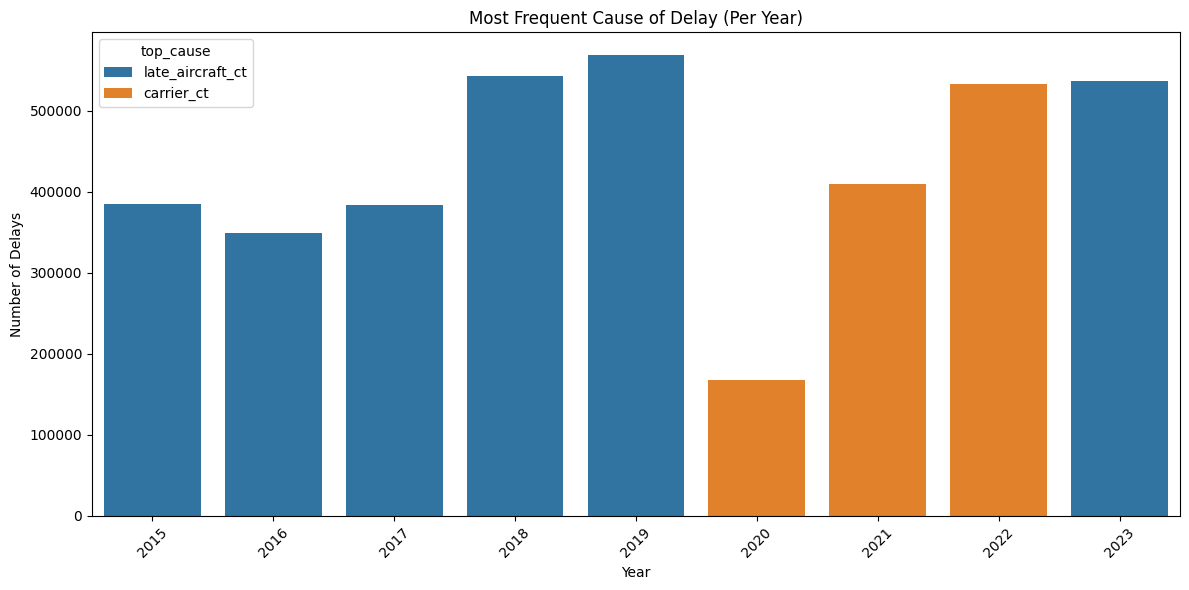

In [ ]:
#most frequent cause of delay per year
plt.figure(figsize=(12,6))
sns.barplot(x=top_cause_summary.index, y='cause_count', hue='top_cause', data=top_cause_summary.reset_index())
plt.title('Most Frequent Cause of Delay (Per Year)')
plt.ylabel('Number of Delays')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Group by Month and Carrier
carrier_monthly = df.groupby(['month', 'carrier']).agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum'
}).reset_index()

# Calculate delay ratio
carrier_monthly['delay_ratio'] = carrier_monthly['arr_del15'] / carrier_monthly['arr_flights']

# Get the top carrier for each month
top_carrier_by_month = carrier_monthly.loc[carrier_monthly.groupby('month')['delay_ratio'].idxmax()]


airport_monthly = df.groupby(['month', 'airport']).agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum'
}).reset_index()
airport_monthly['delay_ratio'] = airport_monthly['arr_del15'] / airport_monthly['arr_flights']
top_airport_by_month = airport_monthly.loc[airport_monthly.groupby('month')['delay_ratio'].idxmax()]


delay_causes = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']

# Group by month
cause_by_month = df.groupby('month')[delay_causes].sum()

# Most frequent cause per month
top_cause_by_month = cause_by_month.idxmax(axis=1)
top_cause_counts_month = cause_by_month.max(axis=1)

top_cause_month_summary = pd.DataFrame({
    'top_cause': top_cause_by_month,
    'cause_count': top_cause_counts_month
})



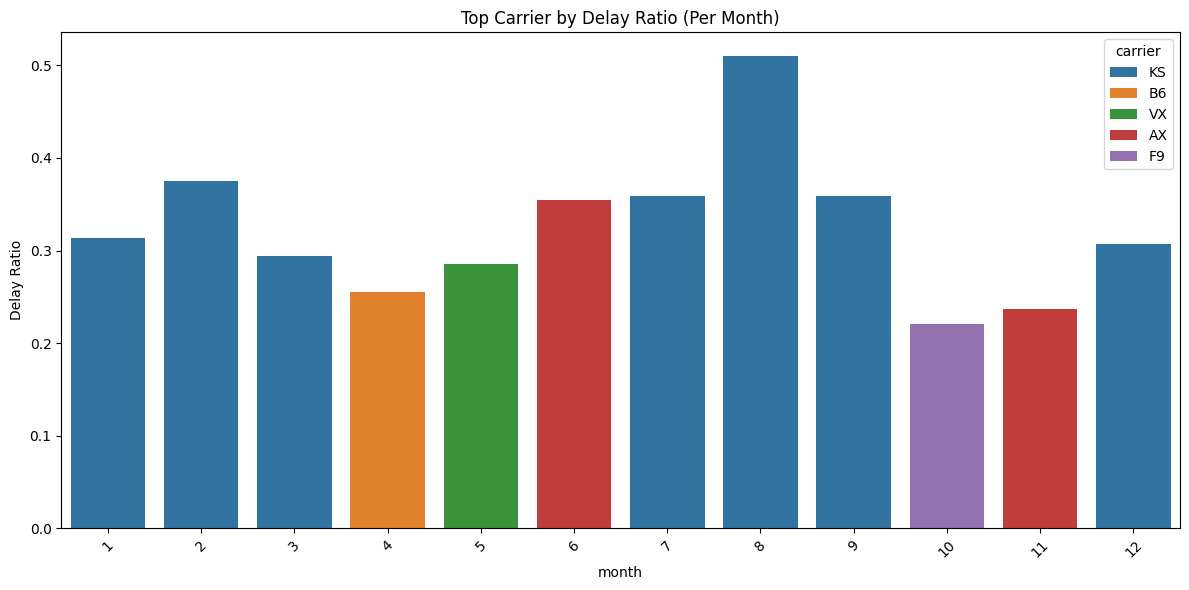

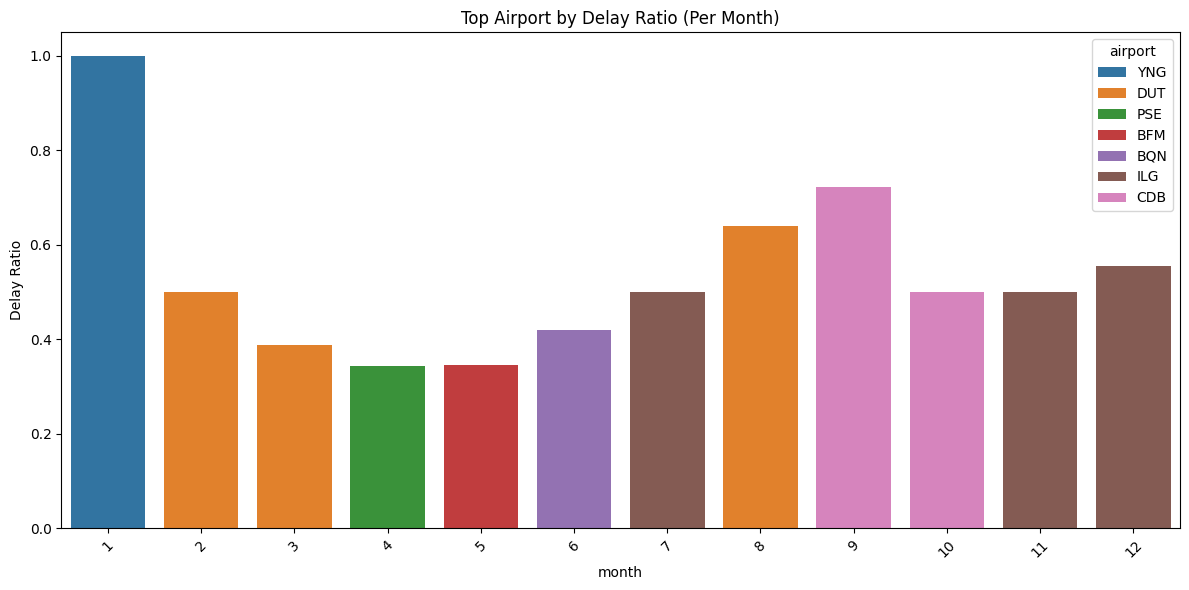

In [ ]:
#top carrier by delay ratio per month
plt.figure(figsize=(12,6))
sns.barplot(data=top_carrier_by_month, x='month', y='delay_ratio', hue='carrier')
plt.title('Top Carrier by Delay Ratio (Per Month)')
plt.ylabel('Delay Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#top airport by delay ratio per month
plt.figure(figsize=(12,6))
sns.barplot(data=top_airport_by_month, x='month', y='delay_ratio', hue='airport')
plt.title('Top Airport by Delay Ratio (Per Month)')
plt.ylabel('Delay Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



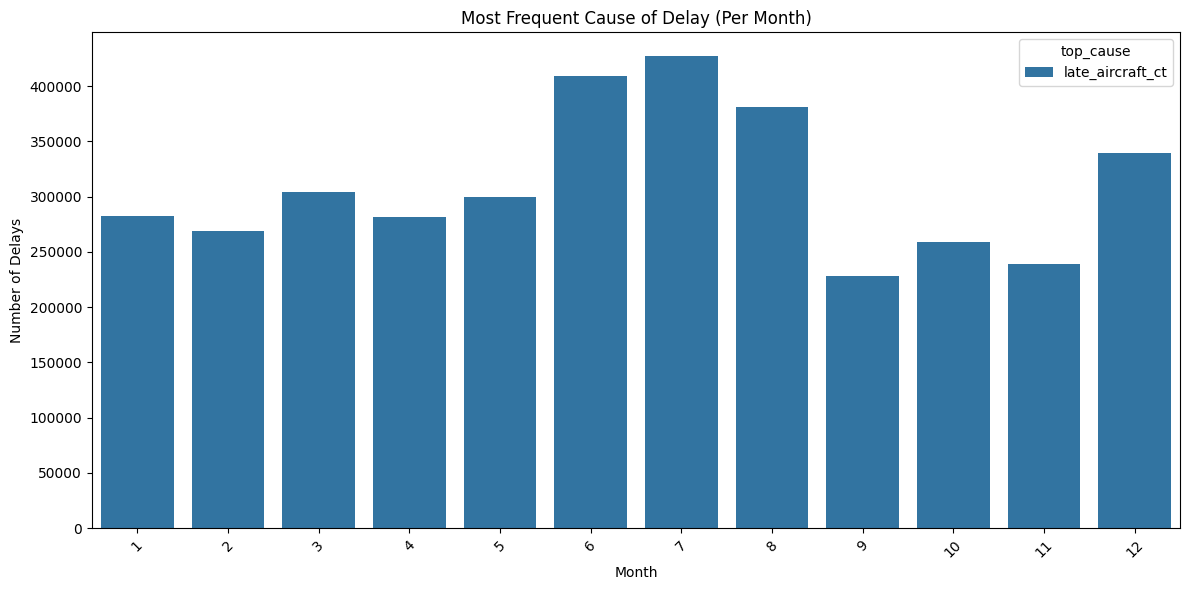

In [ ]:
#most frequent cause of delay per month
plt.figure(figsize=(12,6))
sns.barplot(x=top_cause_month_summary.index, y='cause_count', hue='top_cause', data=top_cause_month_summary.reset_index())
plt.title('Most Frequent Cause of Delay (Per Month)')
plt.ylabel('Number of Delays')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**FEATURE ENGINEERING**

In [ ]:
# Assuming your DataFrame has a 'carrier' code and 'carrier_name'
carrier_mapping = df[['carrier', 'carrier_name']].drop_duplicates()

# Count how many distinct names exist for each carrier code
multi_name_carriers = carrier_mapping.groupby('carrier')['carrier_name'].nunique().reset_index()

# Filter carrier codes with more than one airline name
multi_name_carriers = multi_name_carriers[multi_name_carriers['carrier_name'] > 1]

# Join to see the actual airline names
multi_name_details = df[df['carrier'].isin(multi_name_carriers['carrier'])][['carrier', 'carrier_name']].drop_duplicates()

# Display results
print("Carrier codes with more than one airline name:")
display(multi_name_carriers)

print("Airline names for those carrier codes:")
display(multi_name_details.sort_values('carrier'))


Carrier codes with more than one airline name:


carrier  carrier_name
2       AA             2
3       AS             2
6       C5             2
8       DL             2
10      EV             2
11      F9             2
14      HA             2
17      NK             2
22      UA             2
25      WN             2

Airline names for those carrier codes:


carrier                               carrier_name
110         AA                  American Airlines Network
141075      AA                     American Airlines Inc.
141175      AS                       Alaska Airlines Inc.
511         AS                    Alaska Airlines Network
1569        C5              CommuteAir LLC dba CommuteAir
26759       C5  Commutair Aka Champlain Enterprises, Inc.
522         DL                    Delta Air Lines Network
141307      DL                       Delta Air Lines Inc.
74047       EV                    ExpressJet Airlines LLC
110827      EV                   ExpressJet Airlines Inc.
141857      F9                     Frontier Airlines Inc.
1012        F9                          Frontier Airlines
1261        HA                  Hawaiian Airlines Network
141917      HA                     Hawaiian Airlines Inc.
1778        NK                            Spirit Airlines
141934      NK                           Spirit Air Lines
773         UA                   United Air Lines Network
141489      UA                      United Air Lines Inc.
379         WN                         Southwest Airlines
141616      WN                     Southwest Airlines Co.

In [ ]:
# Step 1: Find carrier codes that map to more than one carrier name
multi_carrier_codes = df.groupby('carrier')['carrier_name'].nunique()
multi_carrier_codes = multi_carrier_codes[multi_carrier_codes > 1].index.tolist()

# Step 2: Filter dataframe for those carrier codes
filtered_carriers_df = df[df['carrier'].isin(multi_carrier_codes)]

# Step 3: Group by carrier_name and calculate total flights and delays
carrier_summary = filtered_carriers_df.groupby(['carrier', 'carrier_name']).agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum'
}).reset_index()

# Step 4: Compute delay ratio
carrier_summary['delay_ratio'] = carrier_summary['arr_del15'] / carrier_summary['arr_flights']

# Step 5: Optional - Sort by delay ratio or total flights
carrier_summary = carrier_summary.sort_values(by='delay_ratio', ascending=False)

# Display
carrier_summary

carrier                               carrier_name  arr_flights  arr_del15  \
10      F9                          Frontier Airlines     816916.0   210540.0   
4       C5  Commutair Aka Champlain Enterprises, Inc.     280544.0    68214.0   
14      NK                           Spirit Air Lines     412396.0    97462.0   
11      F9                     Frontier Airlines Inc.     288984.0    66263.0   
15      NK                            Spirit Airlines    1203757.0   253511.0   
9       EV                    ExpressJet Airlines LLC     149213.0    29713.0   
1       AA                  American Airlines Network    4984475.0   964949.0   
8       EV                   ExpressJet Airlines Inc.    1642482.0   311172.0   
19      WN                     Southwest Airlines Co.    3890743.0   730460.0   
18      WN                         Southwest Airlines    7488028.0  1396611.0   
17      UA                   United Air Lines Network    3361214.0   621995.0   
0       AA                     American Airlines Inc.    2536827.0   467758.0   
16      UA                      United Air Lines Inc.    1645271.0   295142.0   
5       C5              CommuteAir LLC dba CommuteAir      83866.0    14857.0   
3       AS                    Alaska Airlines Network    1311487.0   228298.0   
13      HA                  Hawaiian Airlines Network     416162.0    62102.0   
2       AS                       Alaska Airlines Inc.     534869.0    73824.0   
7       DL                    Delta Air Lines Network    5148525.0   708404.0   
6       DL                       Delta Air Lines Inc.    2722187.0   361056.0   
12      HA                     Hawaiian Airlines Inc.     233233.0    24399.0   

    delay_ratio  
10     0.257725  
4      0.243149  
14     0.236331  
11     0.229296  
15     0.210600  
9      0.199131  
1      0.193591  
8      0.189452  
19     0.187743  
18     0.186513  
17     0.185051  
0      0.184387  
16     0.179388  
5      0.177152  
3      0.174076  
13     0.149226  
2      0.138023  
7      0.137594  
6      0.132635  
12     0.104612

In [ ]:
# Step 1: Find airport codes that map to more than one airport name
multi_airport_codes = df.groupby('airport')['airport_name'].nunique()
multi_airport_codes = multi_airport_codes[multi_airport_codes > 1].index.tolist()

# Step 2: Filter the original dataframe for these airport codes
filtered_airports_df = df[df['airport'].isin(multi_airport_codes)]

# Step 3: Group by airport_name and calculate required metrics
airport_summary = filtered_airports_df.groupby(['airport', 'airport_name']).agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum'
}).reset_index()

# Step 4: Compute delay ratio
airport_summary['delay_ratio'] = airport_summary['arr_del15'] / airport_summary['arr_flights']

# Step 5: Optional - Sort by delay ratio or total flights
# airport_summary = airport_summary.sort_values(by='delay_ratio', ascending=False)

# Display
airport_summary


airport                                       airport_name  arr_flights  \
0      BFM                        Mobile, AL: Mobile Downtown        192.0   
1      BFM                   Mobile, AL: Mobile International         12.0   
2      BLV      Belleville, IL: Scott AFB MidAmerica St Louis       2446.0   
3      BLV               Belleville, IL: Scott AFB/MidAmerica       4162.0   
4      CNY                        Moab, UT: Canyonlands Field       2584.0   
5      CNY                     Moab, UT: Canyonlands Regional       1304.0   
6      CRW  Charleston/Dunbar, WV: West Virginia Internati...      11051.0   
7      CRW                      Charleston/Dunbar, WV: Yeager      20704.0   
8      GCC             Gillette, WY: Gillette Campbell County       5575.0   
9      GCC           Gillette, WY: Northeast Wyoming Regional       1762.0   
10     HYA  Hyannis, MA: Barnstable Municipal-Boardman/Pol...        609.0   
11     HYA                      Hyannis, MA: Cape Cod Gateway        333.0   
12     ITH  Ithaca/Cortland, NY: Ithaca Tompkins Internati...       4967.0   
13     ITH      Ithaca/Cortland, NY: Ithaca Tompkins Regional       8627.0   
14     LAS            Las Vegas, NV: Harry Reid International     430728.0   
15     LAS              Las Vegas, NV: McCarran International     973255.0   
16     MFE  Mission/McAllen/Edinburg, TX: McAllen Internat...       2860.0   
17     MFE  Mission/McAllen/Edinburg, TX: McAllen Miller I...      32773.0   
18     MHT         Manchester, NH: Manchester Boston Regional      22454.0   
19     MHT         Manchester, NH: Manchester-Boston Regional      47538.0   
20     MLB             Melbourne, FL: Melbourne International      13131.0   
21     MLB     Melbourne, FL: Melbourne Orlando International       6210.0   
22     MLI              Moline, IL: Quad Cities International      12622.0   
23     MLI                Moline, IL: Quad City International      27164.0   
24     MQT           Marquette, MI: Marquette Sawyer Regional        559.0   
25     MQT                Marquette, MI: Sawyer International       8660.0   
26     MSO               Missoula, MT: Missoula International      26531.0   
27     MSO                     Missoula, MT: Missoula Montana      12718.0   
28     OAK           Oakland, CA: Metro Oakland International     121675.0   
29     OAK    Oakland, CA: Metropolitan Oakland International     292693.0   
30     PVD  Providence, RI: Rhode Island Tf Green Internat...      44157.0   
31     PVD       Providence, RI: Theodore Francis Green State      90313.0   
32     RDD                     Redding, CA: Redding Municipal       9687.0   
33     RDD                      Redding, CA: Redding Regional        990.0   
34     RIW      Riverton/Lander, WY: Central Wyoming Regional        558.0   
35     RIW             Riverton/Lander, WY: Riverton Regional       1351.0   
36     ROA           Roanoke, VA: Roanoke Blacksburg Regional      16418.0   
37     ROA  Roanoke, VA: Roanoke Blacksburg Regional Woodr...      27032.0   
38     ROC  Rochester, NY: Frederick Douglass Grtr Rochest...      42390.0   
39     ROC     Rochester, NY: Greater Rochester International      72875.0   
40     ROW                    Roswell, NM: Roswell Air Center       2789.0   
41     ROW      Roswell, NM: Roswell International Air Center       5988.0   
42     SCK                       Stockton, CA: Stockton Metro       1603.0   
43     SCK                Stockton, CA: Stockton Metropolitan       2701.0   
44     TOL          Toledo, OH: Eugene F Kranz Toledo Express       2866.0   
45     TOL                         Toledo, OH: Toledo Express       6694.0   
46     XNA      Fayetteville, AR: Northwest Arkansas National      32376.0   
47     XNA      Fayetteville, AR: Northwest Arkansas Regional      62642.0   

    arr_del15  delay_ratio  
0        44.0     0.229167  
1         0.0     0.000000  
2       492.0     0.201145  
3       861.0     0.206872  
4       324.0     0.125387  
5     

In [ ]:
# Yearly Analysis
cancel_divert_yearly = df.groupby('year').agg({
    'arr_flights': 'sum',
    'arr_cancelled': 'sum',
    'arr_diverted': 'sum'
}).reset_index()
cancel_divert_yearly['cancel_ratio'] = cancel_divert_yearly['arr_cancelled'] / cancel_divert_yearly['arr_flights']
cancel_divert_yearly['divert_ratio'] = cancel_divert_yearly['arr_diverted'] / cancel_divert_yearly['arr_flights']

# Monthly Analysis
cancel_divert_monthly = df.groupby('month').agg({
    'arr_flights': 'sum',
    'arr_cancelled': 'sum',
    'arr_diverted': 'sum'
}).reset_index()
cancel_divert_monthly['cancel_ratio'] = cancel_divert_monthly['arr_cancelled'] / cancel_divert_monthly['arr_flights']
cancel_divert_monthly['divert_ratio'] = cancel_divert_monthly['arr_diverted'] / cancel_divert_monthly['arr_flights']

# Carrier-wise Analysis
cancel_divert_carrier = df.groupby(['carrier', 'carrier_name']).agg({
    'arr_flights': 'sum',
    'arr_cancelled': 'sum',
    'arr_diverted': 'sum'
}).reset_index()
cancel_divert_carrier['cancel_ratio'] = cancel_divert_carrier['arr_cancelled'] / cancel_divert_carrier['arr_flights']
cancel_divert_carrier['divert_ratio'] = cancel_divert_carrier['arr_diverted'] / cancel_divert_carrier['arr_flights']

# Airport-wise Analysis
cancel_divert_airport = df.groupby('airport').agg({
    'arr_flights': 'sum',
    'arr_cancelled': 'sum',
    'arr_diverted': 'sum'
}).reset_index()
cancel_divert_airport['cancel_ratio'] = cancel_divert_airport['arr_cancelled'] / cancel_divert_airport['arr_flights']
cancel_divert_airport['divert_ratio'] = cancel_divert_airport['arr_diverted'] / cancel_divert_airport['arr_flights']


<ipython-input-100-335959944>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cancel_divert_yearly, x='year', y='cancel_ratio', ax=ax[0], palette='Reds')
<ipython-input-100-335959944>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cancel_divert_yearly, x='year', y='divert_ratio', ax=ax[1], palette='Blues')


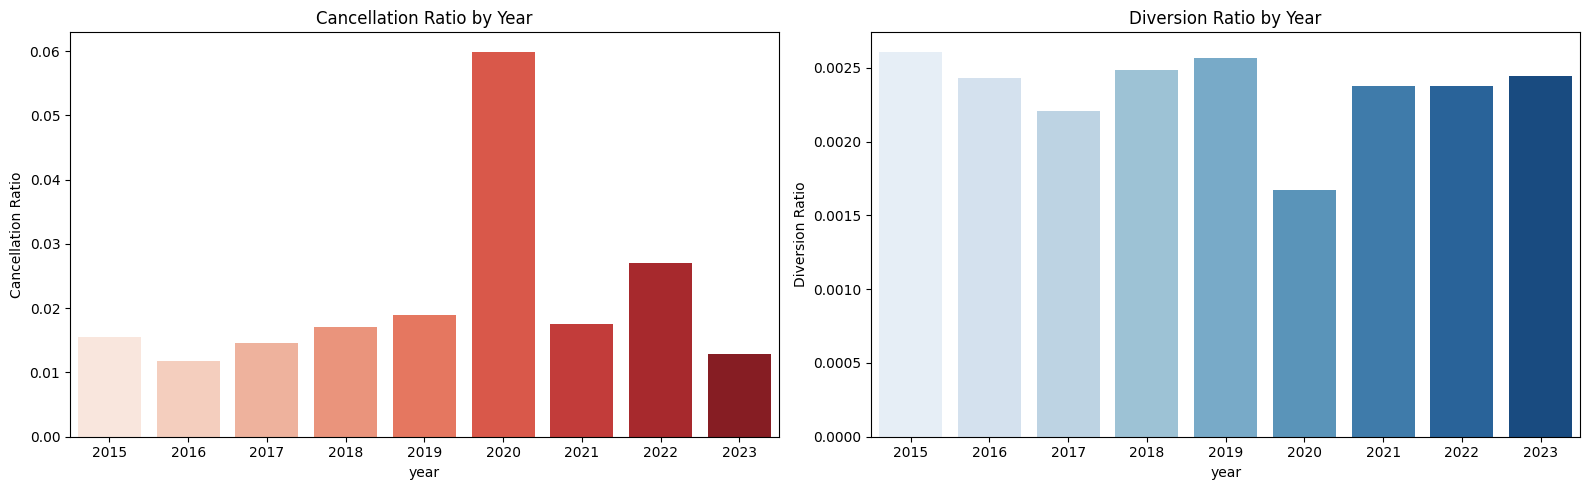

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.barplot(data=cancel_divert_yearly, x='year', y='cancel_ratio', ax=ax[0], palette='Reds')
ax[0].set_title('Cancellation Ratio by Year')
ax[0].set_ylabel('Cancellation Ratio')

sns.barplot(data=cancel_divert_yearly, x='year', y='divert_ratio', ax=ax[1], palette='Blues')
ax[1].set_title('Diversion Ratio by Year')
ax[1].set_ylabel('Diversion Ratio')
plt.tight_layout()
plt.show()

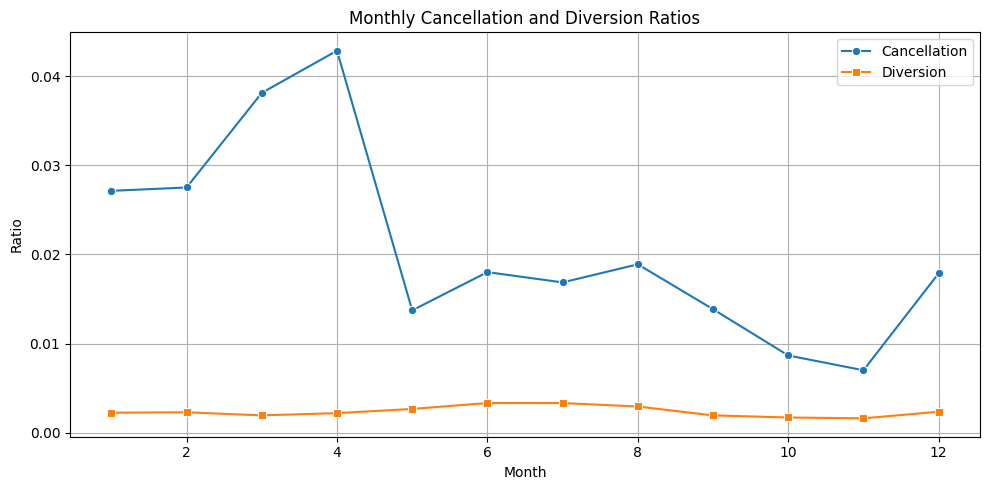

In [ ]:
# Line plot for clearer monthly seasonality
plt.figure(figsize=(10, 5))
sns.lineplot(data=cancel_divert_monthly, x='month', y='cancel_ratio', label='Cancellation', marker='o')
sns.lineplot(data=cancel_divert_monthly, x='month', y='divert_ratio', label='Diversion', marker='s')
plt.title('Monthly Cancellation and Diversion Ratios')
plt.xlabel('Month')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-104-2371074858>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cancel_carriers, x='carrier', y='cancel_ratio', palette='Reds')


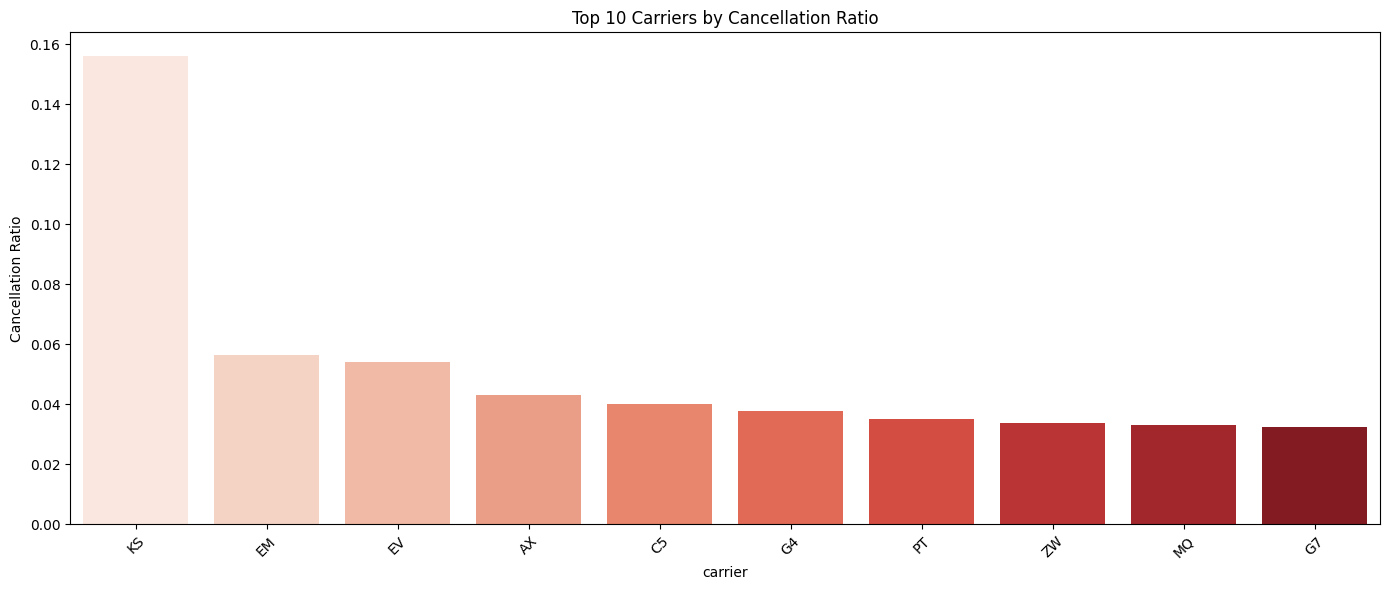

<ipython-input-104-2371074858>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_divert_carriers, x='carrier', y='divert_ratio', palette='Blues')


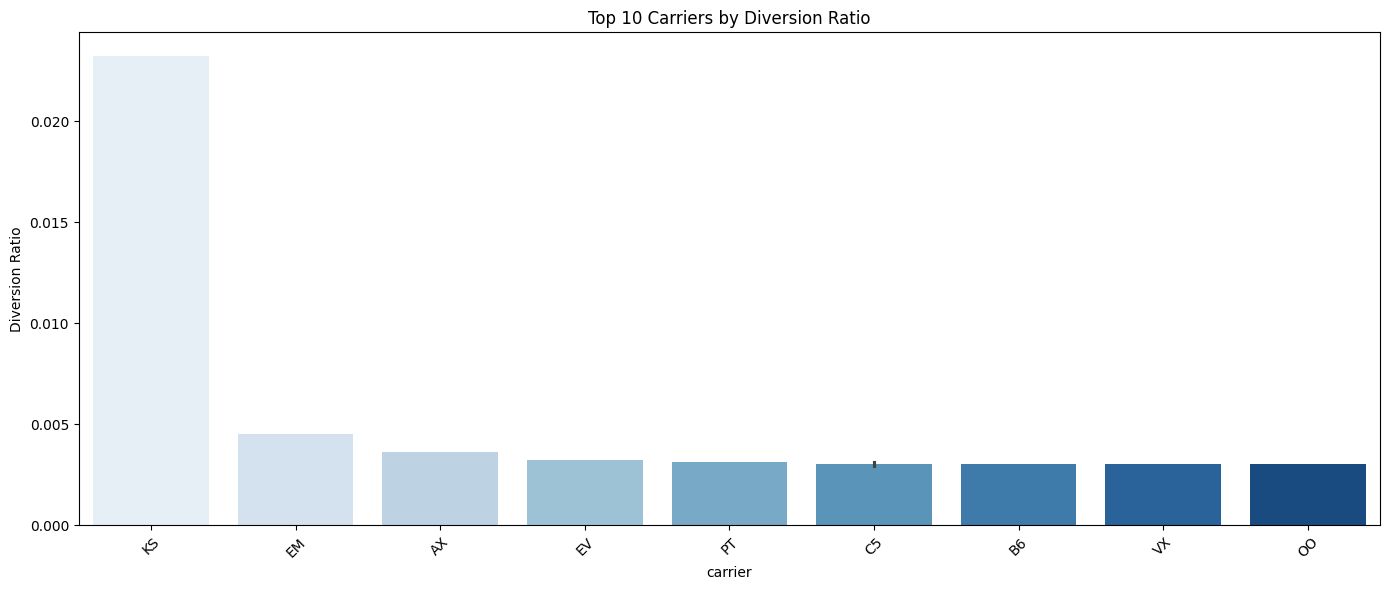

<ipython-input-104-2371074858>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cancel_airports, x='airport', y='cancel_ratio', palette='Reds')


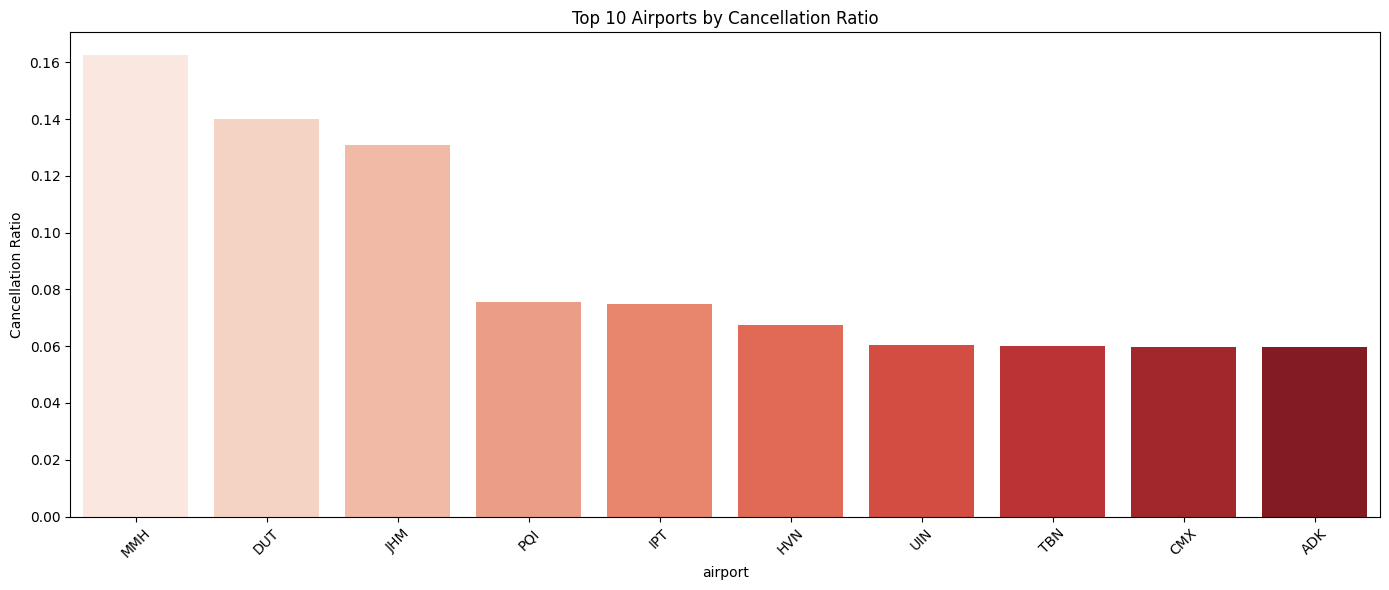

<ipython-input-104-2371074858>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_divert_airports, x='airport', y='divert_ratio', palette='Blues')


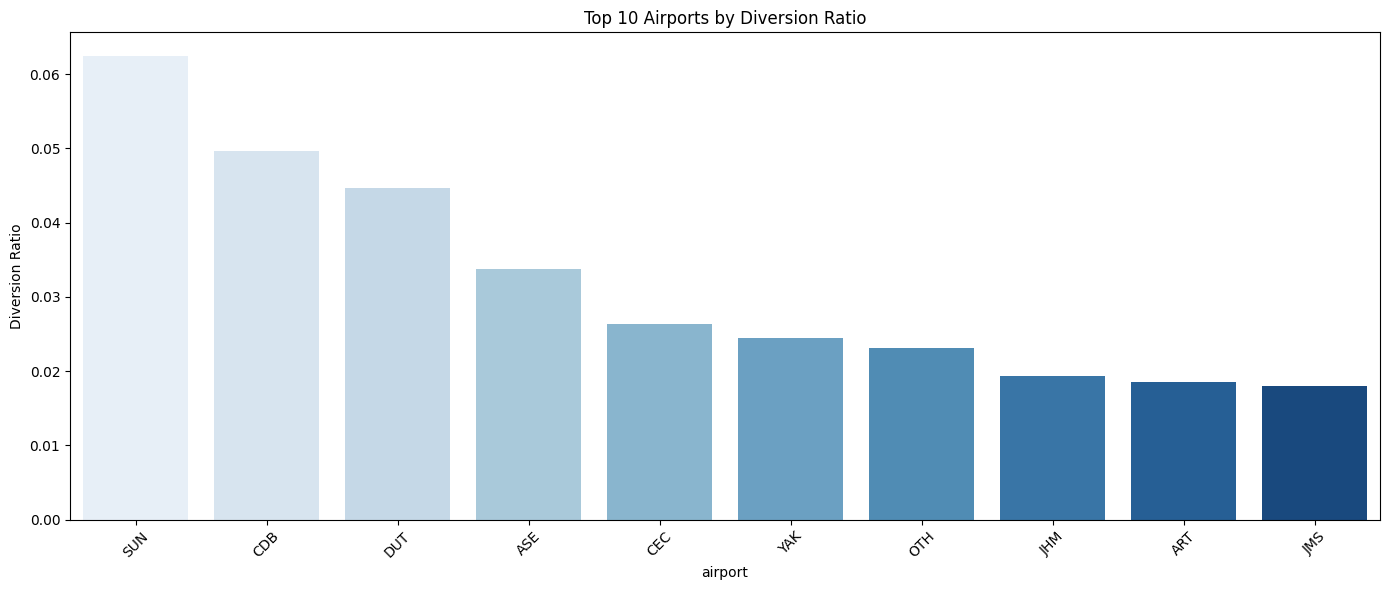

In [ ]:
# Top 10 carriers with highest cancel ratio
top_cancel_carriers = cancel_divert_carrier.sort_values(by='cancel_ratio', ascending=False).head(10)

plt.figure(figsize=(14, 6))
sns.barplot(data=top_cancel_carriers, x='carrier', y='cancel_ratio', palette='Reds')
plt.xticks(rotation=45)
plt.title('Top 10 Carriers by Cancellation Ratio')
plt.ylabel('Cancellation Ratio')
plt.tight_layout()
plt.show()

# Top 10 carriers with highest divert ratio
top_divert_carriers = cancel_divert_carrier.sort_values(by='divert_ratio', ascending=False).head(10)

plt.figure(figsize=(14, 6))
sns.barplot(data=top_divert_carriers, x='carrier', y='divert_ratio', palette='Blues')
plt.xticks(rotation=45)
plt.title('Top 10 Carriers by Diversion Ratio')
plt.ylabel('Diversion Ratio')
plt.tight_layout()
plt.show()

# Top 10 airports with highest cancel ratio
top_cancel_airports = cancel_divert_airport.sort_values(by='cancel_ratio', ascending=False).head(10)

plt.figure(figsize=(14, 6))
sns.barplot(data=top_cancel_airports, x='airport', y='cancel_ratio', palette='Reds')
plt.xticks(rotation=45)
plt.title('Top 10 Airports by Cancellation Ratio')
plt.ylabel('Cancellation Ratio')
plt.tight_layout()
plt.show()

# Top 10 airports with highest divert ratio
top_divert_airports = cancel_divert_airport.sort_values(by='divert_ratio', ascending=False).head(10)

plt.figure(figsize=(14, 6))
sns.barplot(data=top_divert_airports, x='airport', y='divert_ratio', palette='Blues')
plt.xticks(rotation=45)
plt.title('Top 10 Airports by Diversion Ratio')
plt.ylabel('Diversion Ratio')
plt.tight_layout()
plt.show()




**MODEL AND TRAINING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,mean_absolute_error, mean_squared_error
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
count_col = ['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']
df['arr_del15'] = df['arr_del15'].fillna(df[count_col].sum(axis=1))
df.dropna(inplace=True)

In [ ]:
df['delay_ratio'] = df['arr_del15']/df['arr_flights']

In [ ]:
class_df = df[['airport','carrier','month']]
threshold = 0.5
class_df['is_delayed'] = (df['delay_ratio'] >= threshold).astype(int)

<ipython-input-138-2146970653>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['is_delayed'] = (df['delay_ratio'] >= threshold).astype(int)


In [ ]:
X = class_df[['airport', 'carrier', 'month']]
y = class_df['is_delayed']

In [ ]:
X_encoded = X.copy()
cat_cols = ['airport', 'carrier']

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73     22293
           1       0.54      0.47      0.50     13507

    accuracy                           0.65     35800
   macro avg       0.62      0.61      0.62     35800
weighted avg       0.64      0.65      0.64     35800

Confusion Matrix:
 [[16894  5399]
 [ 7134  6373]]
ROC AUC Score: 0.6683197151742611


In [ ]:
y.value_counts()

is_delayed
0    111463
1     67534
Name: count, dtype: int64

In [ ]:
smote = SMOTE(random_state = 42)
x_resampled , y_resampled = smote.fit_resample(X_train,y_train)

In [ ]:
clf.fit(x_resampled,y_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.65      0.69     22293
           1       0.51      0.58      0.54     13507

    accuracy                           0.63     35800
   macro avg       0.61      0.62      0.61     35800
weighted avg       0.64      0.63      0.63     35800

Confusion Matrix:
 [[14564  7729]
 [ 5620  7887]]
ROC AUC Score: 0.6644054664644864


In [ ]:
X_test.shape

(35800, 3)

In [ ]:
df['OAI'] = 2 * (df['carrier_delay'] + df['late_aircraft_delay']) + \
            1 * (df['weather_delay'] + df['nas_delay'] + df['security_delay'])

features = ['airport', 'carrier', 'month', 'delay_ratio']
X = df[features]
y = df['OAI']

In [ ]:
encoder = OrdinalEncoder()
X_encoded = X.copy()
X_encoded[['airport', 'carrier']] = encoder.fit_transform(X_encoded[['airport', 'carrier']])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [ ]:
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = regressor.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 2208.860338622387
RMSE: 6804.750080814143


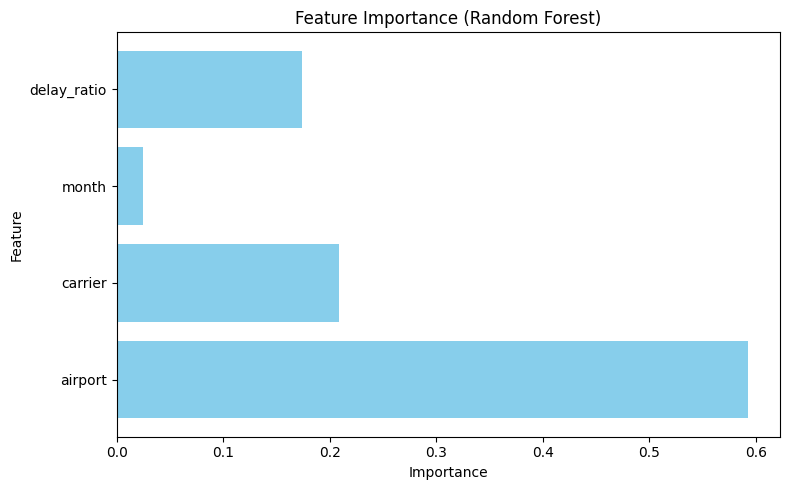

In [ ]:
importances = regressor.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8,5))
plt.barh(feature_names, importances, color='skyblue')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
top_delays = df.groupby(['carrier', 'month'])['OAI'].mean().sort_values(ascending=False).head(10)
top_delays

carrier  month
WN       7        29658.616210
         6        27794.750594
AA       7        24064.701313
WN       8        23923.069048
AA       6        22845.025756
WN       12       22312.570922
AA       8        20876.776824
WN       5        19837.163290
         4        18725.761677
         3        18204.416366
Name: OAI, dtype: float64

In [ ]:
class_df['delay_ratio'] =df['delay_ratio']
class_df.drop(['is_delayed'], axis = 1 , inplace = True )
class_df['avg_delay']= df['arr_delay']/df['arr_del15']
class_df.dropna(inplace=True)

<ipython-input-126-2114821848>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['delay_ratio'] =df['delay_ratio']
<ipython-input-126-2114821848>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df.drop(['is_delayed'], axis = 1 , inplace = True )
<ipython-input-126-2114821848>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [ ]:
X = class_df[['airport', 'carrier', 'month']]
y = class_df['avg_delay']

In [ ]:
X_encoded = X.copy()
cat_cols = ['airport', 'carrier']

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

In [ ]:
X_encoded

airport  carrier  month
0             0        0     12
1            11        0     12
2            12        0     12
3            14        0     12
4            23        0     12
...         ...      ...    ...
179333      267       25      1
179334      269       25      1
179335      277       25      1
179336      278       25      1
179337      282       25      1

[170374 rows x 3 columns]

In [ ]:
X_encoded['delay_ratio'] = class_df['delay_ratio']

In [ ]:
X_encoded

airport  carrier  month  delay_ratio
0             0        0     12     0.069444
1            11        0     12     0.112903
2            12        0     12     0.105263
3            14        0     12     0.086957
4            23        0     12     0.121270
...         ...      ...    ...          ...
179333      267       25      1     0.206278
179334      269       25      1     0.298013
179335      277       25      1     0.270916
179336      278       25      1     0.218159
179337      282       25      1     0.222510

[170374 rows x 4 columns]

In [ ]:
y

0         134.400000
1          49.714286
2          85.900000
3          37.500000
4          83.687500
             ...    
179333     45.820652
179334     53.133333
179335     50.073529
179336     43.231214
179337     55.087209
Name: avg_delay, Length: 170374, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [ ]:
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = regressor.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 21.10845155858473
RMSE: 38.534521071385505
